In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle
import os
import osmnx as ox
from pyrosm import OSM

PROCESS FLOW

1. Download census tract data from https://www2.census.gov/geo/tiger/TIGER2024/BG/; note id from https://www2.census.gov/geo/tiger/TIGER_RD18/STATE/
2. Download OSM data for a given state here https://download.geofabrik.de/north-america/us.html
3. Download ACS data from https://data.census.gov/table/ACSDT5Y2022.B19013; filter to "every block group in {county of target city}; save as acs_city folder, rename nothing inside
4. Run the following code block to process data
5. Add new city to list of cities in graph code, run graph code

In [6]:
cities_to_ids = {
    "newyork": 36,
    "losangeles": "06",
    "chicago": 17,
    "houston": 48,
    "phoenix": "04",
    "philadelphia": 42,
    "sanantonio": 48,
    "sandiego": "06",
    "dallas": 48,
    "jacksonville": 12,
    "austin": 48,
    "fortworth": 48, 
    "sanjose": "06",
    "columbus": 39,
    "charlotte": 37,
    "indianapolis": 18,
    "sanfrancisco": "06",
    "seattle": 53,
    "denver": "08",
    "oklahomacity": 40,
    "nashville": 47,
    "washington": 11,
    "elpaso": 48,
    "lasvegas": 32,
    "boston": 25,
    "detroit": 26,
    "portland": 41,
    "louisville": 21,
    "memphis": 47,
    "baltimore": 24,
    "milwaukee": 55,
    "albuquerque": 35,
    "tucson": "04",
    "fresno": "06",
    "sacramento": "06",
    "mesa": "04", 
    "atlanta": 13,
    "kansascity": 20
}

cities_to_states = {
    "newyork": "new-york",
    "losangeles": "california",
    "chicago": "illinois",
    "houston": "texas",
    "phoenix": "arizona",
    "philadelphia": "pennsylvania",
    "sanantonio": "texas",
    "sandiego": "california",
    "dallas": "texas",
    "jacksonville": "florida",
    "austin": "texas",
    "fortworth": "texas", 
    "sanjose": "california",
    "columbus": "ohio",
    "charlotte": "north-carolina",
    "indianapolis": "indiana",
    "sanfrancisco": "california",
    "seattle": "washington",
    "denver": "colorado",
    "oklahomacity": "oklahoma",
    "nashville": "tennessee",
    "washington": "district-of-columbia",
    "elpaso": "texas",
    "lasvegas": "nevada",
    "boston": "massachusetts",
    "detroit": "michigan",
    "portland": "oregon",
    "louisville": "kentucky",
    "memphis": "tennessee",
    "baltimore": "maryland",
    "milwaukee": "wisconsin",
    "albuquerque": "new-mexico",
    "tucson": "arizona",
    "fresno": "california",
    "sacramento": "california",
    "mesa": "arizona", 
    "atlanta": "georgia",
    "kansascity": "kansas"
}

In [7]:
# def convert_to_geojson(city, formal_city):
#     # Download the Massachusetts OSM data (make sure to download the .osm.pbf file first)
#     city_fp = f'{city}-latest.osm.pbf'

#     # Define the boundaries of Boston (this will automatically query OSM for Boston's polygon)
#     city_boundary = ox.geocode_to_gdf(f"{formal_city}, USA")

#     print("boundary defined")

#     # Extract all building data within Boston
#     tags = {"amenity": ["library", "fire_station", "fast_food", "bank", "place_of_worship", "pharmacy", "social_facility", "police", "community_centre"],
#         "leisure": ["park"],
#         "building": ["school", "hospital", "residential", "house", "apartments"],
#            "shop": ["supermarket"],
#            "railway": ["subway"]}  # Adjust the tags for other data types
#     gdf = ox.features_from_polygon(city_boundary.geometry[0], tags)

#     print("gdf extracted")

#     # Save the data to a file (e.g., GeoJSON)
#     gdf.to_file(f"buildings/{city}_buildings.geojson", driver="GeoJSON")

In [8]:
# def convert_to_geojson(city, formal_city):
#     # Define the path to the local OSM file
#     city_fp = f"osm/{cities_to_states[city]}-latest.osm.pbf"

#     # Load the OSM data locally
#     osm = OSM(city_fp)

#     # Define the boundaries of the city (still using OSMnx to geocode)
#     city_boundary = ox.geocode_to_gdf(f"{formal_city}, USA")
#     print("Boundary defined")

#     # Get the boundary geometry
#     city_geom = city_boundary.geometry.iloc[0]

#     # Convert city geometry to bounding box (minx, miny, maxx, maxy)
#     bbox = city_geom.bounds

#     # Define the OSM tags you want to extract
#     tags = {
#         "amenity": ["library", "fire_station", "fast_food", "bank", "place_of_worship", "pharmacy", "social_facility", "police", "community_centre"],
#         "leisure": ["park"],
#         "building": ["school", "hospital", "residential", "house", "apartments"],
#         "landuse": ["residential"],
#         "shop": ["supermarket"],
#         "railway": ["subway"]
#     }

#     # Extract data using pyrosm for each tag category
#     gdfs = []
#     for key, values in tags.items():
#         gdf = osm.get_data_by_custom_criteria(custom_filter={key: values}, filter_type="keep")
        
#         # Clip the data to the bounding box
#         if gdf is not None and not gdf.empty:
#             gdf = gdf[gdf.intersects(city_geom)]  # Filter by actual boundary
#             gdfs.append(gdf)

#     # Merge all extracted data into a single GeoDataFrame
#     if gdfs:
#         final_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs="EPSG:4326")
#         print("Data extracted successfully")

#         # Save to a GeoJSON file
#         output_fp = f"buildings/{city}_buildings.geojson"
#         final_gdf.to_file(output_fp, driver="GeoJSON")
#         print(f"GeoJSON saved at {output_fp}")
#     else:
#         print("No data extracted for the specified tags.")


In [9]:
def convert_to_geojson(city, formal_city):
    # Define the path to the local OSM file
    city_fp = f"osm/{cities_to_states[city]}-latest.osm.pbf"

    # Load the OSM data locally
    osm = OSM(city_fp)

    # Define the boundaries of the city (using OSMnx to geocode)
    city_boundary = ox.geocode_to_gdf(f"{formal_city}, USA")
    print("Boundary defined")

    # Get the city boundary geometry
    city_geom = city_boundary.geometry.iloc[0]

    # Define the OSM tags you want to extract (all in one dictionary)
    tags = {
        "amenity": ["library", "fire_station", "bank", "place_of_worship", "pharmacy", "social_facility", "police", "community_centre"],
        "leisure": ["park"],
        "building": ["school", "hospital", "residential", "house", "apartments"],
        "landuse": ["residential"],
        "shop": ["supermarket"],
        "highway": ["bus_stop"]
    }

    # Perform a **single** call to get all features that match the tags
    gdf = osm.get_data_by_custom_criteria(custom_filter=tags, filter_type="keep")

    # Filter data to keep only those within the city boundary
    if gdf is not None and not gdf.empty:
        try:
            gdf = gdf[gdf.geometry.is_valid]
            gdf = gdf[gdf.intersects(city_geom)]
            gdf = gdf.drop(columns=["id", "timestamp"], errors="ignore")
            print("Data extracted successfully")
        except Exception as e:
            invalid = gdf.loc[~gdf.geometry.is_valid]
            print(e, invalid)

        # Save to a GeoJSON file
        output_fp = f"buildings/{city}_buildings.geojson"
        gdf.to_file(output_fp, driver="GeoJSON")
        print(f"GeoJSON saved at {output_fp}")
    else:
        print("No data extracted for the specified tags.")


In [10]:
%%time
# GENERALIZABLE FUNCTION

def process_data(city, id):

    # Load the census tract shapefile
    census_tracts = gpd.read_file(f'tl/tl_2024_{id}_bg/tl_2024_{id}_bg.shp')
    
    # Load the OSM data (make sure it includes location data as points or polygons)
    osm_data = gpd.read_file(f'buildings/{city}_buildings.geojson')
        

    # Reproject if needed (make sure both are in the same CRS)
    osm_data = osm_data.to_crs(census_tracts.crs)
    
    # Perform the spatial join
    osm_with_geoid = gpd.sjoin(osm_data, census_tracts[['GEOID', 'geometry']], how='left')
    
    # Load the ACS data
    acs_data = pd.read_csv(f"acs/acs_{city}/ACSDT5Y2022.B19013-Data.csv")
    
    acs_data = acs_data.rename(columns={"B19013_001E": "MedHouseIncome"})
    acs_data["GEO_ID"] = acs_data["GEO_ID"].apply(lambda x: x[9:])
    acs_data["MedHouseIncome"] = acs_data["MedHouseIncome"].apply(lambda x: float('nan') if x == "-" else x)
    acs_data = acs_data.drop(0)

    # Filter to include only BG_ID_10 and MedHouseIncome columns
    acs_income = acs_data[['GEO_ID', 'MedHouseIncome']]
    
    acs_income = acs_income.astype(str)
    acs_income = acs_income.dropna(subset=["MedHouseIncome"])
    
    # Now merge the data
    combined_with_income = osm_with_geoid.merge(acs_income, left_on="GEOID", right_on="GEO_ID", how="left")

    combined_with_income = combined_with_income.dropna(subset=["MedHouseIncome"])
        
    return combined_with_income

CPU times: user 5 μs, sys: 0 ns, total: 5 μs
Wall time: 10 μs


In [11]:
%%time

cities = cities_to_ids.keys()

formal_cities = ["New York, New York", "Los Angeles, California", "Chicago, Illinois", "Houston, Texas", "Phoenix, Arizona", "Philadelphia, Pennsylvania", "San Antonio, Texas", "San Diego, California",
                 "Dallas, Texas", "Jacksonville, Florida", "Austin, Texas", "Fort Worth, Texas", "San Jose, California", "Columbus, Ohio", "Charlotte, North Carolina", "Indianapolis, Indiana", "San Francisco, California",
                 "Seattle, Washington", "Denver, Colorado", "Oklahoma City, Oklahoma", "Nashville, Tennessee", "Washington, District of Columbia", "El Paso, Texas", "Las Vegas, Nevada", "Boston, Massachusetts",
                 "Detroit, Michigan", "Portland, Oregon", "Louisville, Kentucky", "Memphis, Tennessee", "Baltimore, Maryland", "Milwaukee, Wisconsin", "Albuquerque, New Mexico", "Tucson, Arizona", "Fresno, California",
                 "Sacramento, California", "Mesa, Arizona", "Atlanta, Georgia", "Kansas City, Kansas"]

CPU times: user 7 μs, sys: 2 μs, total: 9 μs
Wall time: 14.3 μs


In [ ]:
%%time
dataframes = {}

for city, formal_city in zip(cities_to_ids.keys(), formal_cities):
    if not os.path.exists(f"buildings/{city}_buildings.geojson"):
        convert_to_geojson(city, formal_city)
    dataframes[city] = process_data(city, cities_to_ids[city])
    print(city, "complete! length", len(dataframes[city]))

newyork complete! length 91615
Boundary defined


/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/pyrosm/user_defined.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/pyrosm/user_defined.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(


Data extracted successfully
GeoJSON saved at buildings/losangeles_buildings.geojson
losangeles complete! length 814897
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/chicago_buildings.geojson
chicago complete! length 36898
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/houston_buildings.geojson
houston complete! length 29694
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/phoenix_buildings.geojson
phoenix complete! length 306731
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/philadelphia_buildings.geojson
philadelphia complete! length 19407
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/sanantonio_buildings.geojson
sanantonio complete! length 30154
Boundary defined


/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/pyrosm/user_defined.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/pyrosm/user_defined.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(


Data extracted successfully
GeoJSON saved at buildings/sandiego_buildings.geojson
sandiego complete! length 19183
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/dallas_buildings.geojson
dallas complete! length 246866
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/jacksonville_buildings.geojson
jacksonville complete! length 44656
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/austin_buildings.geojson
austin complete! length 17346
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/fortworth_buildings.geojson
fortworth complete! length 218890
Boundary defined


/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/pyrosm/user_defined.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/pyrosm/user_defined.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(


Data extracted successfully
GeoJSON saved at buildings/sanjose_buildings.geojson
sanjose complete! length 27322
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/columbus_buildings.geojson
columbus complete! length 47284
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/charlotte_buildings.geojson
charlotte complete! length 99862
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/indianapolis_buildings.geojson
indianapolis complete! length 46138
Boundary defined


/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/pyrosm/user_defined.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/pyrosm/user_defined.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(


Data extracted successfully
GeoJSON saved at buildings/sanfrancisco_buildings.geojson
sanfrancisco complete! length 11920
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/seattle_buildings.geojson
seattle complete! length 105508
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/denver_buildings.geojson
denver complete! length 84652
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/oklahomacity_buildings.geojson
oklahomacity complete! length 17868
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/nashville_buildings.geojson
nashville complete! length 28253
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/washington_buildings.geojson
washington complete! length 56057
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/elpaso_buildings.geojson
elpaso complete! length 3076
Boundary defined
Data extracted successfully
GeoJSON saved at buildings/lasvegas_buildin

/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/pyrosm/user_defined.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/pyrosm/user_defined.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gdf = prepare_geodataframe(


Will be important to note - how many block groups have we calculated, vs how many exist?

Can also compare current income bins to expected income bins to get an idea for accuracy.

In [ ]:
# with open('dataframes.pkl', 'wb') as handle:
#     pickle.dump(dataframes, handle)

In [2]:
with open('dataframes.pkl', 'rb') as handle:
    dataframes = pickle.load(handle)

In [3]:
print(len(dataframes))

38


newyork
INCOME BINS for METHODS
 [  9024.          66674.66666667 100807.66666667 249653.        ]
losangeles
INCOME BINS for METHODS
 [  9704.          63614.66666667  98536.66666667 249583.        ]
chicago
INCOME BINS for METHODS
 [ 10541.          56250.          90340.33333333 245139.        ]
houston
INCOME BINS for METHODS
 [  8696.  48772.  79879. 248750.]
phoenix
INCOME BINS for METHODS
 [ 15000.          59976.33333333  91092.33333333 244453.        ]
philadelphia
INCOME BINS for METHODS
 [  6173.  46007.  76731. 224792.]
sanantonio
INCOME BINS for METHODS
 [ 12075.          48994.66666667  76187.         243446.        ]
sandiego
INCOME BINS for METHODS
 [ 14026.          82271.         120342.33333333 248997.        ]
dallas
INCOME BINS for METHODS
 [ 11322.          52316.66666667  81434.66666667 248500.        ]
jacksonville
INCOME BINS for METHODS
 [ 11556.  51500.  78625. 215121.]
austin
INCOME BINS for METHODS
 [  5404.          73701.33333333 109963.33333333 249080.  

<timed exec>:141: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.


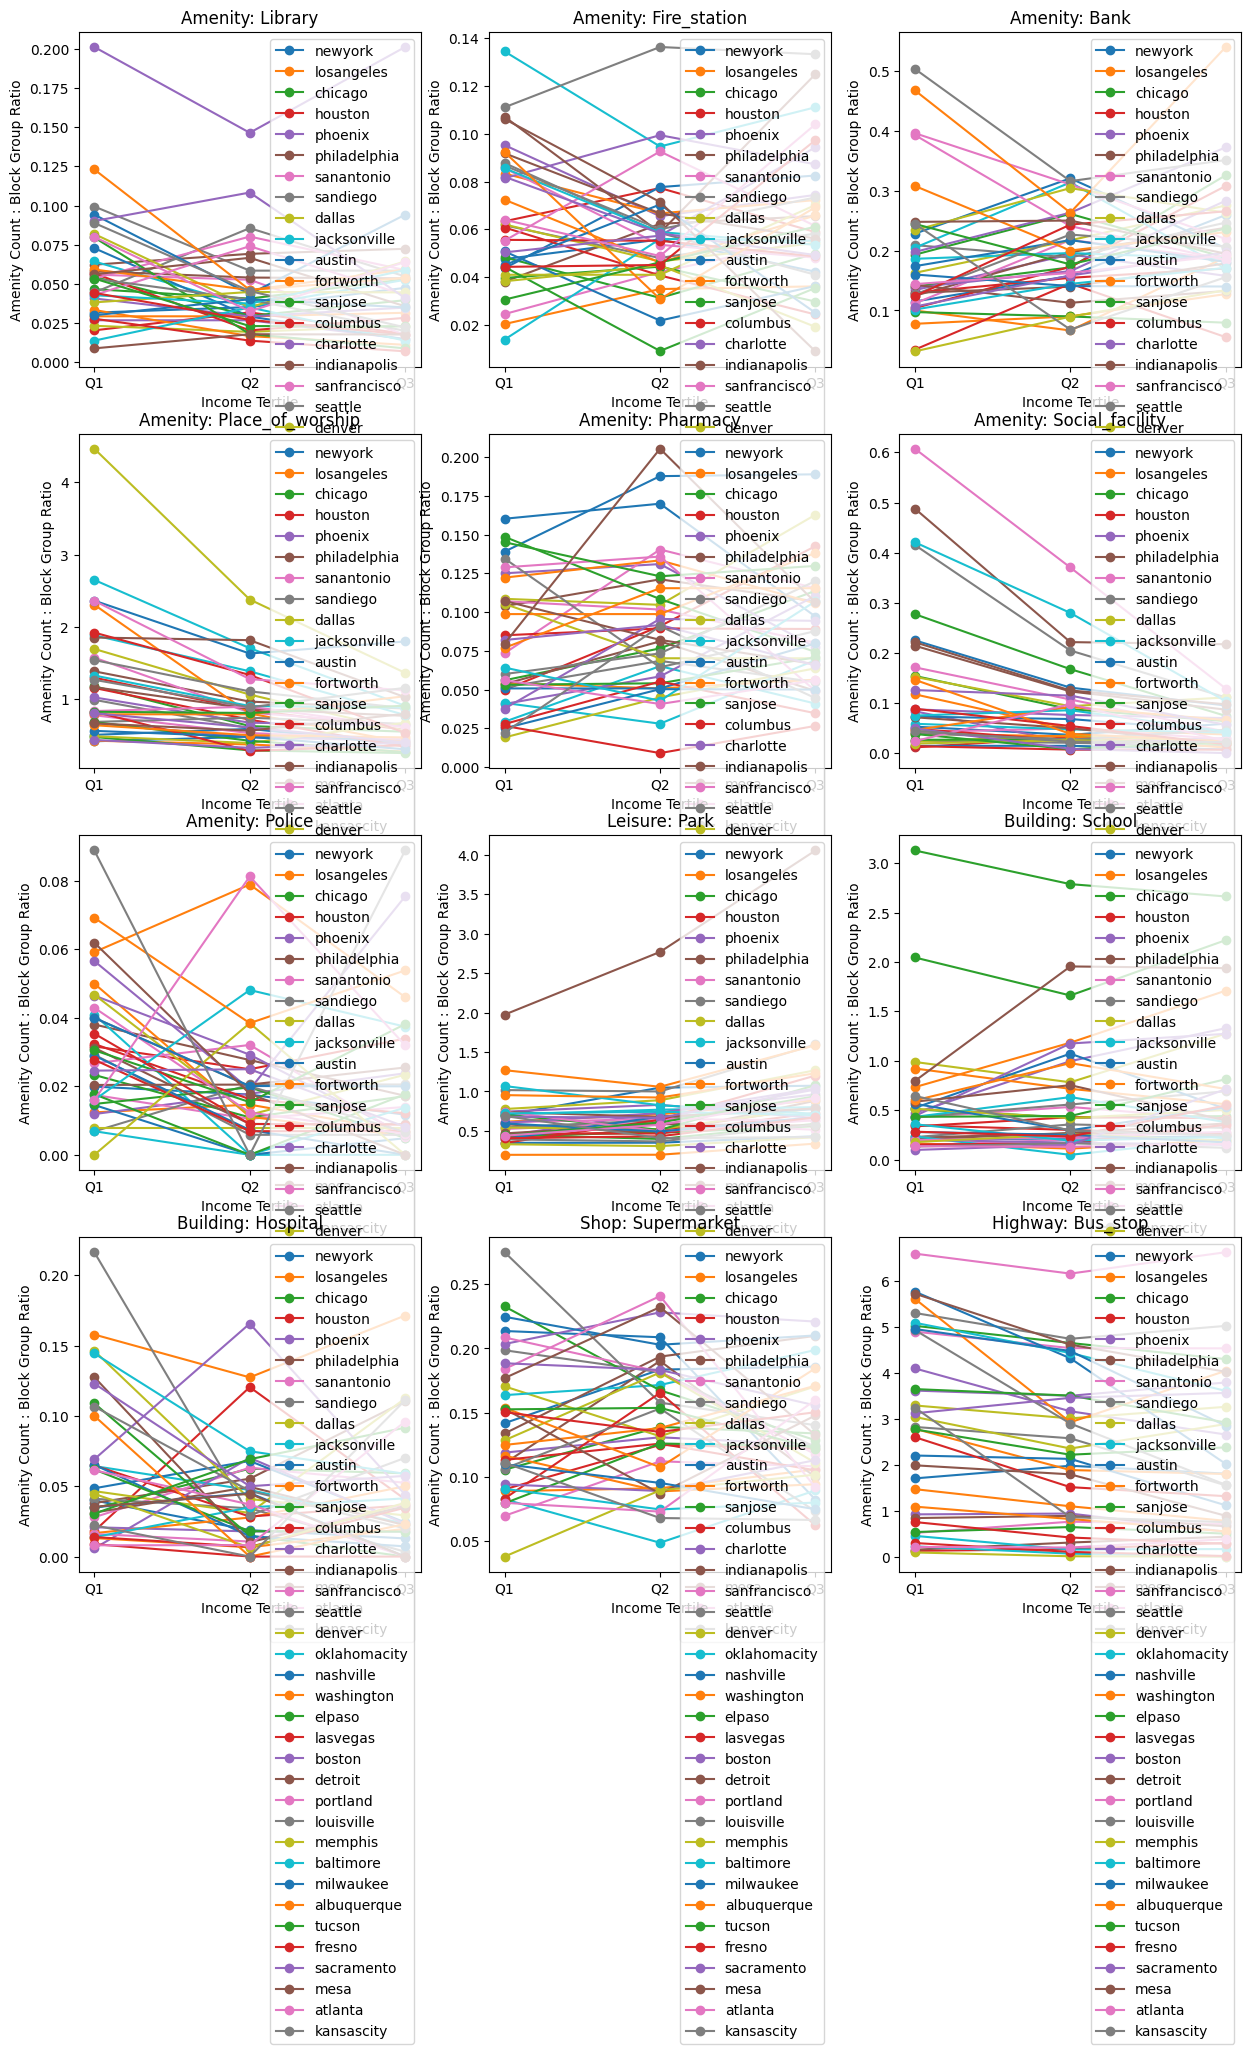

CPU times: user 14.9 s, sys: 2.95 s, total: 17.9 s
Wall time: 18 s


In [12]:
%%time
# Define the function to calculate normalized counts by income range for multiple cities and categories
def category_normalized_counts_by_income(categories, city_names, num_quintiles=3):
    all_results = {}

    # Process each city dataframe
    for city_name in city_names:
        
        print(city_name)
        
        df = dataframes[city_name]
        
        df.drop(['income_range'], axis=1, errors='ignore', inplace=True)
        
        # Ensure MedHouseIncome is numeric
        df["MedHouseIncome"] = pd.to_numeric(df["MedHouseIncome"], errors="coerce")
        
        # Drop rows where MedHouseIncome is NaN after conversion
        df = df.dropna(subset=["MedHouseIncome"])

        # Step 1: Calculate income quintiles based on unique block groups
        unique_bg = df.drop_duplicates(subset=["GEO_ID"])[["GEO_ID", "MedHouseIncome"]]
    
        unique_bg["income_range"], income_bins = pd.qcut(
            unique_bg["MedHouseIncome"], 
            q=num_quintiles, 
            retbins=True, 
            labels=[f"Q{i+1}" for i in range(num_quintiles)]
        )
    
        
        print("INCOME BINS for METHODS\n", income_bins)
        
        
        # Step 2: Count the number of block groups in each income range
        block_group_counts = unique_bg.groupby("income_range", observed=False).size().reset_index(name="bg_count") 
        
        #print("BLOCK GROUP COUNTS\n", block_group_counts)

        # Step 3: Merge income range back to the main DataFrame
        df = pd.merge(df, unique_bg[["GEO_ID", "income_range"]], on="GEO_ID", how="left")
        city_results = {}
        for category, items in categories.items():
            category_results = {}
            for item in items:
                # Step 4: Filter for rows where the feature matches the specified item in the category
                filtered_data = df[df[category] == item]
                
                #print(filtered_data.head())
                
                # Step 5: Count the occurrences of the item per income range
                counts_by_income = filtered_data.groupby("income_range", observed=False).size().reset_index(name="count")
                # Step 6: Merge with block group counts to get `bg_count` for each income range
                counts_with_bg = pd.merge(counts_by_income, block_group_counts, on="income_range", how="left")
                # Step 7: Calculate the normalized count (service count per block group) across cities
                counts_with_bg["normalized_count"] = counts_with_bg["count"] / counts_with_bg["bg_count"]

                # Store the results for each item in the current category
                category_results[item] = counts_with_bg[["income_range", "normalized_count"]]
            
            # Store the category results in the main results dictionary for this city
            city_results[category] = category_results
        
        # Store all results for each city by name
        all_results[city_name] = city_results
        dataframes[city_name] = df
    
    return all_results, income_bins


# Function to calculate concavity using a quadratic fit
def calculate_concavity(data):
    # Replace NaNs with 0 for concavity calculation if necessary
    y = data["normalized_count"].fillna(0).values
    x = np.arange(len(y))
    
    # Fit a quadratic curve (second-degree polynomial) to the data
    coeffs = np.polyfit(x, y, 2)
    
    # The concavity is the coefficient of the x^2 term
    concavity = coeffs[0]
    return concavity

categories = {
    "amenity": ["library", "fire_station", "bank", "place_of_worship", "pharmacy", "social_facility", "police"],
    "leisure": ["park"],
    "building": ["school", "hospital"],
    "shop": ["supermarket"],
    "highway": ["bus_stop"]
}

# List of city dataframes and corresponding names
city_names = list(cities_to_ids.keys())

# Run the function to get results and income bins
results, income_bins = category_normalized_counts_by_income(categories, city_names)

# Determine grid dimensions based on total items across all categories
total_items = sum(len(items) for items in categories.values())
cols = 3  # Number of columns in the grid
rows = math.ceil(total_items / cols)  # Calculate the number of rows required

# Plotting in a 2D grid
fig, axs = plt.subplots(rows, cols, figsize=(15, rows * 5))
#fig.suptitle("Normalized Amenity to Block Group Ratio by Income Tertile")

# Track the subplot index
plot_index = 0

# Loop through each category and item
for category, items in categories.items():
    for item in items:
        # Determine the current row and column based on plot_index
        row = plot_index // cols
        col = plot_index % cols
        ax = axs[row, col] if rows > 1 else axs[col]  # Handle single-row or multi-row cases

        # Plot each city's data for the current item and calculate concavity
        for idx, (city_name, city_data) in enumerate(results.items()):
            data = city_data[category][item]
            ax.plot(data["income_range"], data["normalized_count"], marker='o', linestyle='-', label=f"{city_name}")
            
#             # Calculate concavity
#             concavity = calculate_concavity(data)
            
#             # Position the label vertically based on the city index to avoid overlap
#             y_position = 0.9 - (idx * 0.1)  # Stagger vertically by 0.1 per city
#             ax.text(0.05, y_position, f"{city_name} Concavity: {concavity:.5f}", transform=ax.transAxes, fontsize=10, verticalalignment='top')

        # Set titles and labels for each subplot
        ax.set_title(f"{category.capitalize()}: {item.capitalize()}")
        ax.set_xlabel("Income Tertile")
        ax.set_ylabel("Amenity Count : Block Group Ratio")
        ax.legend()
        
        plot_index += 1

# Hide any unused subplots if the grid has extra cells
for j in range(plot_index, rows * cols):
    fig.delaxes(axs[j // cols, j % cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
plt.show()

In [13]:
results

{'newyork': {'amenity': {'library':   income_range  normalized_count
   0           Q1          0.031672
   1           Q2          0.035191
   2           Q3          0.047507,
   'fire_station':   income_range  normalized_count
   0           Q1          0.047507
   1           Q2          0.055718
   2           Q3          0.042229,
   'bank':   income_range  normalized_count
   0           Q1          0.114956
   1           Q2          0.157771
   2           Q3          0.259238,
   'place_of_worship':   income_range  normalized_count
   0           Q1          0.415836
   1           Q2          0.477419
   2           Q3          0.432258,
   'pharmacy':   income_range  normalized_count
   0           Q1          0.139003
   1           Q2          0.187683
   2           Q3          0.188856,
   'social_facility':   income_range  normalized_count
   0           Q1          0.052786
   1           Q2          0.036364
   2           Q3          0.058651,
   'police':   income_

In [14]:
classifications = {
    "quality-of-life": {
        "amenity": ["library", "place_of_worship"],
        "building": [],
        "leisure": ["park"],
        "shop": ["supermarket"],
        "highway": []
    },
    "economic-mobility": {
        "amenity": ["social_facility", "bank"],
        "building": [],
        "leisure": ["school"],
        "shop": [],
        "highway": ["bus_stop"]
    },
    "health-and-safety": {
        "amenity": ["fire_station", "police", "pharmacy"],
        "building": ["hospital"],
        "leisure": [],
        "shop": [],
        "highway": []
    }
}

In [15]:
city_names = cities_to_ids.keys()

class_counts = {}

for city in city_names:
    class_counts[city] = {
        "CCU": {
            "quality-of-life": 0,
            "economic-mobility": 0,
            "health-and-safety": 0,
        },
        "CCD": {
            "quality-of-life": 0,
            "economic-mobility": 0,
            "health-and-safety": 0,
        },
        "LP": {
            "quality-of-life": 0,
            "economic-mobility": 0,
            "health-and-safety": 0,
        },
        "LN": {
            "quality-of-life": 0,
            "economic-mobility": 0,
            "health-and-safety": 0,
        }
    }
    
    for category, items in categories.items():
        try:
            for item in items:
                distances = list(results[city][category][item]["normalized_count"])
                q1 = distances[0]
                q2 = distances[1]
                q3 = distances[2]

                if item in classifications["quality-of-life"][category]:
                    purpose = "quality-of-life"
                elif item in classifications["economic-mobility"][category]:
                    purpose = "economic-mobility"
                else:
                    purpose = "health-and-safety"

                if q1 > q2 < q3:
                    class_counts[city]["CCU"][purpose] += 1
                elif q1 < q2 > q3:
                    class_counts[city]["CCD"][purpose] += 1
                elif q1 < q2 < q3:
                    class_counts[city]["LP"][purpose] += 1
                elif q1 > q2 > q3:
                    class_counts[city]["LN"][purpose] += 1
        except KeyError:
            continue

In [16]:
mux = pd.MultiIndex.from_product([city_names, ["CCU", "CCD", "LP", "LN"], ["quality-of-life", "economic-mobility", "health-and-safety"]])
df = pd.DataFrame(class_counts, columns=mux)

In [17]:
# Flatten the nested dictionary into a DataFrame-friendly format
flattened_data = []

for city, categories in class_counts.items():
    for category, metrics in categories.items():
        for metric, value in metrics.items():
            flattened_data.append((city, category, metric, value))

# Convert to a DataFrame
df = pd.DataFrame(flattened_data, columns=["City", "Category", "Metric", "Value"])

# Pivot to create MultiIndex columns
df_pivot = df.pivot(index="City", columns=["Metric", "Category"], values="Value")

# Display the resulting DataFrame
df_pivot

Metric       quality-of-life economic-mobility health-and-safety  \
Category                 CCU               CCU               CCU   
City                                                               
albuquerque                3                 1                 3   
atlanta                    2                 1                 3   
austin                     0                 0                 1   
baltimore                  2                 0                 2   
boston                     3                 1                 1   
charlotte                  1                 0                 0   
chicago                    2                 0                 3   
columbus                   1                 0                 1   
dallas                     3                 1                 4   
denver                     2                 2                 2   
detroit                    2                 1                 1   
elpaso                     1                 0                 2   
fortworth                  1                 1                 1   
fresno                     1                 0                 2   
houston                    0                 0                 1   
indianapolis               0                 0                 1   
jacksonville               1                 1                 1   
kansascity                 2                 1                 2   
lasvegas                   1                 1                 2   
losangeles                 0                 0                 2   
louisville                 1                 1                 1   
memphis                    1                 0                 1   
mesa                       1                 0                 0   
milwaukee                  1                 0                 0   
nashville                  3                 0                 2   
newyork                    0                 1                 0   
oklahomacity               1                 0                 3   
philadelphia               1                 0                 0   
phoenix                    0                 1                 1   
portland                   1                 1                 0   
sacramento                 1                 0                 1   
sanantonio                 0                 0                 1   
sandiego                   0                 1                 1   
sanfrancisco               0                 0                 1   
sanjose                    1                 1                 0   
seattle                    1                 2                 2   
tucson                     1                 2                 3   
washington                 2                 2                 3   

Metric       quality-of-life economic-mobility health-and-safety  \
Category                 CCD               CCD               CCD   
City                                                               
albuquerque                0                 0                 1   
atlanta                    0                 1                 1   
austin                     1                 1                 3   
baltimore                  1                 1                 1   
boston                     0                 0                 2   
charlotte                  2                 1                 2   
chicago                    1                 0                 1   
columbus                   1                 0                 1   
dallas                     0                 1                 0   
denver                     1                 1                 0   
detroit                    1                 0                 1   
elpaso                     1                 2                 0   
fortworth                  0                 0                 1   
fresno                     0                 0                 0   
houston                    2                 1         

In [18]:
# Flatten and sum the nested dictionary
category_counts = {"CCD": {}, "CCU": {}, "LP": {}, "LN": {}}

for city, categories in class_counts.items():
    
    city_totals = {}
    for category, metrics in categories.items():
        # Sum across all metrics for each category
        category_counts[category][city] = sum(metrics.values())

# Convert to DataFrame
counts_df = pd.DataFrame(category_counts)

# Display the DataFrame
counts_df


CCD  CCU  LP  LN
newyork         3    1   6   2
losangeles      1    2   5   3
chicago         2    5   2   3
houston         6    1   4   1
phoenix         3    2   3   2
philadelphia    2    1   6   3
sanantonio      8    1   1   2
sandiego        2    2   2   5
dallas          1    8   1   1
jacksonville    3    3   2   3
austin          5    1   2   4
fortworth       1    3   2   6
sanjose         3    2   1   6
columbus        2    2   2   6
charlotte       5    1   3   3
indianapolis    4    1   3   4
sanfrancisco    3    1   1   7
seattle         2    5   0   3
denver          2    6   1   1
oklahomacity    3    4   1   4
nashville       1    5   1   3
washington      2    7   1   0
elpaso          3    3   2   4
lasvegas        3    4   2   3
boston          2    5   3   2
detroit         2    4   1   5
portland        5    2   1   4
louisville      3    3   1   5
memphis         5    2   3   2
baltimore       3    4   1   4
milwaukee       4    1   0   7
albuquerque     1    7   0   3
tucson          1    6   3   2
fresno          0    3   3   5
sacramento      3    2   3   4
mesa            6    1   1   4
atlanta         2    6   3   1
kansascity      2    5   0   5

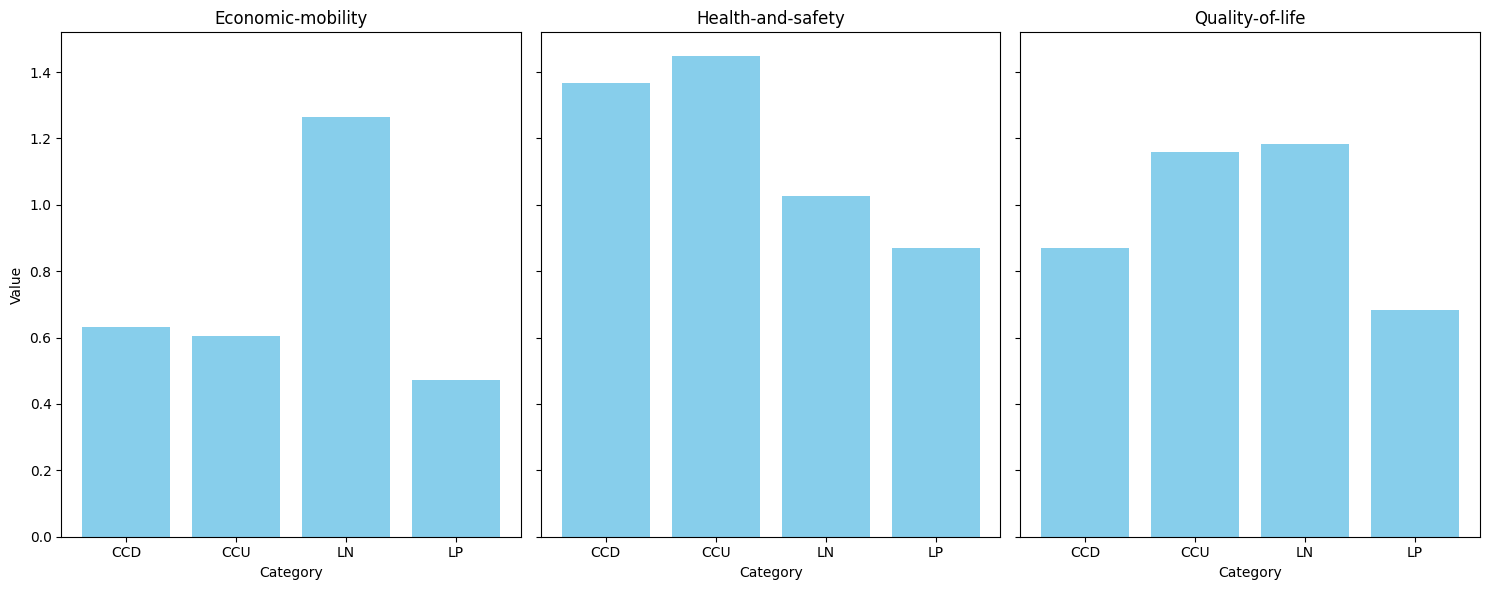

In [19]:
# Average the values grouped by Metric and Category
df_avg = df.groupby(["Metric", "Category"])["Value"].mean().reset_index()

# Unique metrics for separate subplots
metrics = df_avg["Metric"].unique()

# Create a grid of bar plots
fig, axs = plt.subplots(1, len(metrics), figsize=(15, 6), sharey=True)

for i, metric in enumerate(metrics):
    metric_data = df_avg[df_avg["Metric"] == metric]
    axs[i].bar(metric_data["Category"], metric_data["Value"], color='skyblue')
    axs[i].set_title(f"{metric.capitalize()}")
    axs[i].set_xlabel("Category")
    axs[i].set_ylabel("Value" if i == 0 else "")

plt.tight_layout()
plt.show()

In [20]:
cities_to_founding = {
    "newyork": 1624,
    "losangeles": 1781,
    "chicago": 1837,
    "houston": 1837,
    "phoenix": 1881,
    "philadelphia": 1682,
    "sanantonio": 1718,
    "sandiego": 1769,
    "dallas": 1841,
    "jacksonville": 1822,
    "austin": 1839,
    "fortworth": 1849, 
    "sanjose": 1777,
    "columbus": 1812,
    "charlotte": 1768,
    "indianapolis": 1821,
    "sanfrancisco": 1776,
    "seattle": 1851,
    "denver": 1858,
    "oklahomacity": 1889,
    "nashville": 1779,
    "washington": 1790,
    "elpaso": 1873,
    "lasvegas": 1905,
    "boston": 1630,
    "detroit": 1701,
    "portland": 1851,
    "louisville": 1778,
    "memphis": 1819,
    "baltimore": 1729,
    "milwaukee": 1846,
    "albuquerque": 1706,
    "tucson": 1775,
    "fresno": 1872,
    "sacramento": 1848,
    "mesa": 1878, 
    "atlanta": 1837,
    "kansascity": 1861
}

In [21]:
# Add founding date as a new column
df_pivot["Founding Date"] = df_pivot.index.get_level_values("City").map(cities_to_founding)

# Sort by the founding date
df_sorted = df_pivot.reset_index().sort_values(by="Founding Date").set_index(["City"])

# Display the sorted DataFrame
df_sorted.head()

Metric       quality-of-life economic-mobility health-and-safety  \
Category                 CCU               CCU               CCU   
City                                                               
newyork                    0                 1                 0   
boston                     3                 1                 1   
philadelphia               1                 0                 0   
detroit                    2                 1                 1   
albuquerque                3                 1                 3   

Metric       quality-of-life economic-mobility health-and-safety  \
Category                 CCD               CCD               CCD   
City                                                               
newyork                    1                 1                 1   
boston                     0                 0                 2   
philadelphia               1                 0                 1   
detroit                    1                 0                 1   
albuquerque                0                 0                 1   

Metric       quality-of-life economic-mobility health-and-safety  \
Category                  LP                LP                LP   
City                                                               
newyork                    3                 1                 2   
boston                     1                 1                 1   
philadelphia               1                 2                 3   
detroit                    0                 0                 1   
albuquerque                0                 0                 0   

Metric       quality-of-life economic-mobility health-and-safety Founding Date  
Category                  LN                LN                LN                
City                                                                            
newyork                    0                 0                 2          1624  
boston                     0                 1                 1          1630  
philadelphia               1                 1                 1          1682  
detroit                    1                 2                 2          1701  
albuquerque                1                 2                 0          1706

quality-of-life - CCU:
  Slope: -0.002
  Intercept: 4.567
  R-squared: 0.021
  P-value: 3.899e-01
  Std Err: 0.002
quality-of-life - CCD:
  Slope: 0.001
  Intercept: -0.628
  R-squared: 0.006
  P-value: 6.424e-01
  Std Err: 0.002
quality-of-life - LN:
  Slope: 0.003
  Intercept: -3.710
  R-squared: 0.067
  P-value: 1.169e-01
  Std Err: 0.002
quality-of-life - LP:
  Slope: -0.002
  Intercept: 4.586
  R-squared: 0.046
  P-value: 1.959e-01
  Std Err: 0.002
economic-mobility - CCU:
  Slope: -0.000
  Intercept: 1.478
  R-squared: 0.002
  P-value: 7.678e-01
  Std Err: 0.002
economic-mobility - CCD:
  Slope: 0.001
  Intercept: -0.401
  R-squared: 0.003
  P-value: 7.247e-01
  Std Err: 0.002
economic-mobility - LN:
  Slope: 0.002
  Intercept: -2.314
  R-squared: 0.028
  P-value: 3.173e-01
  Std Err: 0.002
economic-mobility - LP:
  Slope: -0.002
  Intercept: 3.971
  R-squared: 0.044
  P-value: 2.088e-01
  Std Err: 0.002
health-and-safety - CCU:
  Slope: 0.003
  Intercept: -4.848
  R-squared: 0.0

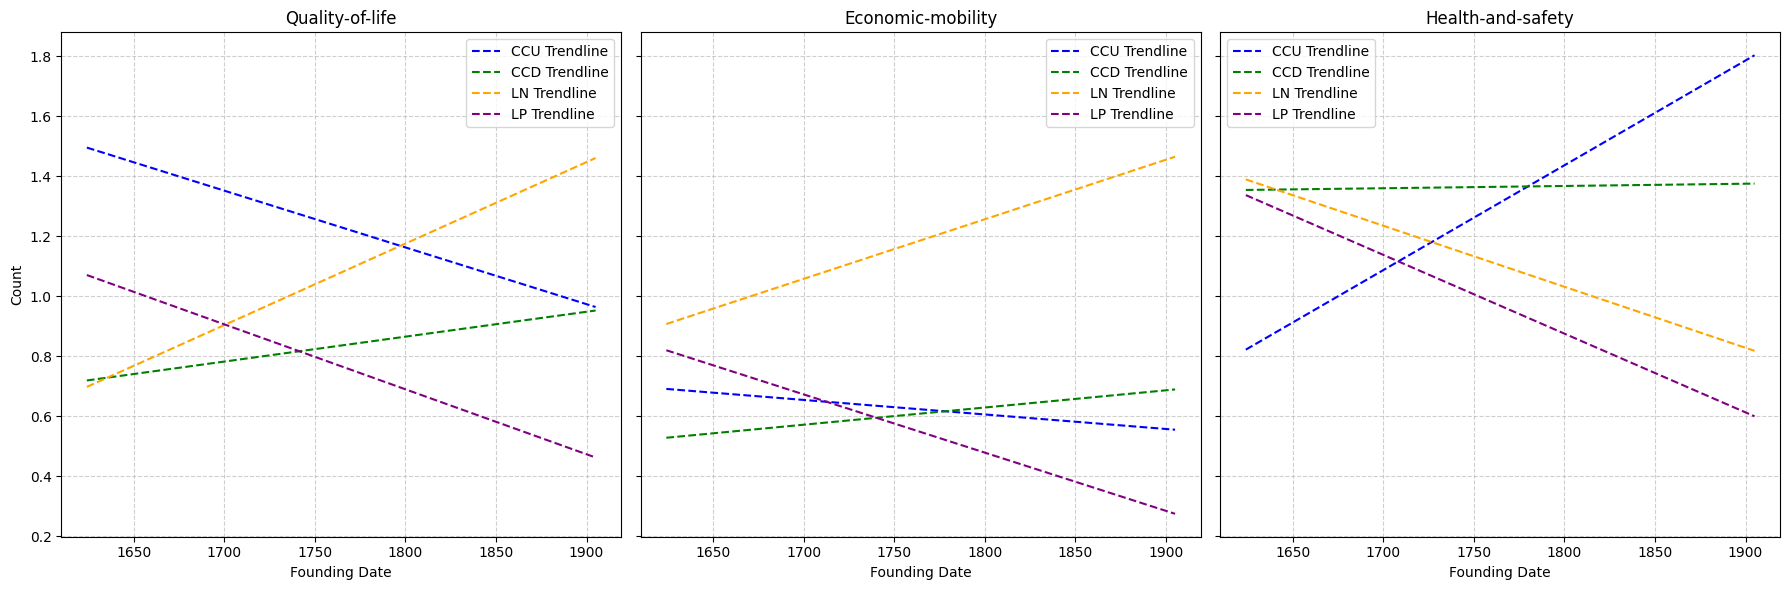

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Initialize subplots for the three amenities
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of amenities (metrics)
amenities = ["quality-of-life", "economic-mobility", "health-and-safety"]

trendlines = ["CCU", "CCD", "LN", "LP"]

# Colors for each category
colors = {"CCU": "blue", "CCD": "green", "LN": "orange", "LP": "purple"}

# Iterate over each amenity to create a subplot
for i, amenity in enumerate(amenities):
    ax = axs[i]
    
    # Filter data for the current amenity
    test_df = df_sorted.loc[:, df_sorted.columns.get_level_values('Metric').isin([amenity, 'Founding Date'])]
    test_df = test_df.loc[:, test_df.columns.get_level_values("Category").isin(trendlines + [''])]

    # Plot trendlines for each category
    for category in trendlines:
        # Extract founding dates and values for the category
        founding_dates = test_df["Founding Date"].values
        values = test_df[(amenity, category)].values.flatten()

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(founding_dates, values)

        # Generate trendline
        trendline = slope * founding_dates + intercept
        ax.plot(founding_dates, trendline, color=colors[category], linestyle='--', label=f"{category} Trendline")
        
        # Print statistical results
        print(f"{amenity} - {category}:")
        print(f"  Slope: {slope:.3f}")
        print(f"  Intercept: {intercept:.3f}")
        print(f"  R-squared: {r_value**2:.3f}")
        print(f"  P-value: {p_value:.3e}")
        print(f"  Std Err: {std_err:.3f}")
    
    # Customize the subplot
    ax.set_title(f"{amenity.capitalize()}")
    ax.set_xlabel("Founding Date")
    if i == 0:
        ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



add test for statistical significance :(

In [23]:
cities_to_population = {
    "newyork": 8419,
    "losangeles": 3985,
    "chicago": 2716,
    "houston": 2320,
    "phoenix": 1703,
    "philadelphia": 1584,
    "sanantonio": 1548,
    "sandiego": 1424,
    "dallas": 1358,
    "jacksonville": 977,
    "austin": 978,
    "fortworth": 942,
    "sanjose": 1021,
    "columbus": 907,
    "charlotte": 912,
    "indianapolis": 887,
    "sanfrancisco": 815,
    "seattle": 773,
    "denver": 739,
    "oklahomacity": 701,
    "nashville": 691,
    "washington": 706,
    "elpaso": 681,
    "lasvegas": 675,
    "boston": 654,
    "detroit": 639,
    "portland": 654,
    "louisville": 627,
    "memphis": 621,
    "baltimore": 575,
    "milwaukee": 569,
    "albuquerque": 563,
    "tucson": 544,
    "fresno": 545,
    "sacramento": 524,
    "mesa": 526,
    "atlanta": 515,
    "kansascity": 508
}

In [24]:
# Add founding date as a new column
df_pivot["Population"] = df_pivot.index.get_level_values("City").map(cities_to_population)

# Sort by the founding date
df_sorted = df_pivot.reset_index().sort_values(by="Population").set_index(["City"])

# Display the sorted DataFrame
df_sorted.head()

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCU               CCU               CCU   
City                                                             
kansascity               2                 1                 2   
atlanta                  2                 1                 3   
sacramento               1                 0                 1   
mesa                     1                 0                 0   
tucson                   1                 2                 3   

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCD               CCD               CCD   
City                                                             
kansascity               0                 0                 2   
atlanta                  0                 1                 1   
sacramento               1                 0                 2   
mesa                     2                 1                 3   
tucson                   1                 0                 0   

Metric     quality-of-life economic-mobility health-and-safety  \
Category                LP                LP                LP   
City                                                             
kansascity               0                 0                 0   
atlanta                  1                 1                 1   
sacramento               0                 2                 1   
mesa                     1                 0                 0   
tucson                   1                 0                 2   

Metric     quality-of-life economic-mobility health-and-safety Founding Date  \
Category                LN                LN                LN                 
City                                                                           
kansascity               2                 2                 1          1861   
atlanta                  1                 0                 0          1837   
sacramento               2                 1                 1          1848   
mesa                     0                 2                 2          1878   
tucson                   1                 1                 0          1775   

Metric     Population  
Category               
City                   
kansascity        508  
atlanta           515  
sacramento        524  
mesa              526  
tucson            544

quality-of-life - CCU:
  Slope: -0.000
  Intercept: 1.430
  R-squared: 0.120
  P-value: 3.337e-02
  Std Err: 0.000
quality-of-life - CCD:
  Slope: 0.000
  Intercept: 0.853
  R-squared: 0.001
  P-value: 8.817e-01
  Std Err: 0.000
quality-of-life - LN:
  Slope: -0.000
  Intercept: 1.334
  R-squared: 0.057
  P-value: 1.478e-01
  Std Err: 0.000
quality-of-life - LP:
  Slope: 0.000
  Intercept: 0.317
  R-squared: 0.371
  P-value: 5.009e-05
  Std Err: 0.000
economic-mobility - CCU:
  Slope: -0.000
  Intercept: 0.628
  R-squared: 0.001
  P-value: 8.180e-01
  Std Err: 0.000
economic-mobility - CCD:
  Slope: 0.000
  Intercept: 0.595
  R-squared: 0.004
  P-value: 7.055e-01
  Std Err: 0.000
economic-mobility - LN:
  Slope: -0.000
  Intercept: 1.425
  R-squared: 0.052
  P-value: 1.687e-01
  Std Err: 0.000
economic-mobility - LP:
  Slope: 0.000
  Intercept: 0.317
  R-squared: 0.079
  P-value: 8.682e-02
  Std Err: 0.000
health-and-safety - CCU:
  Slope: -0.000
  Intercept: 1.603
  R-squared: 0.029
 

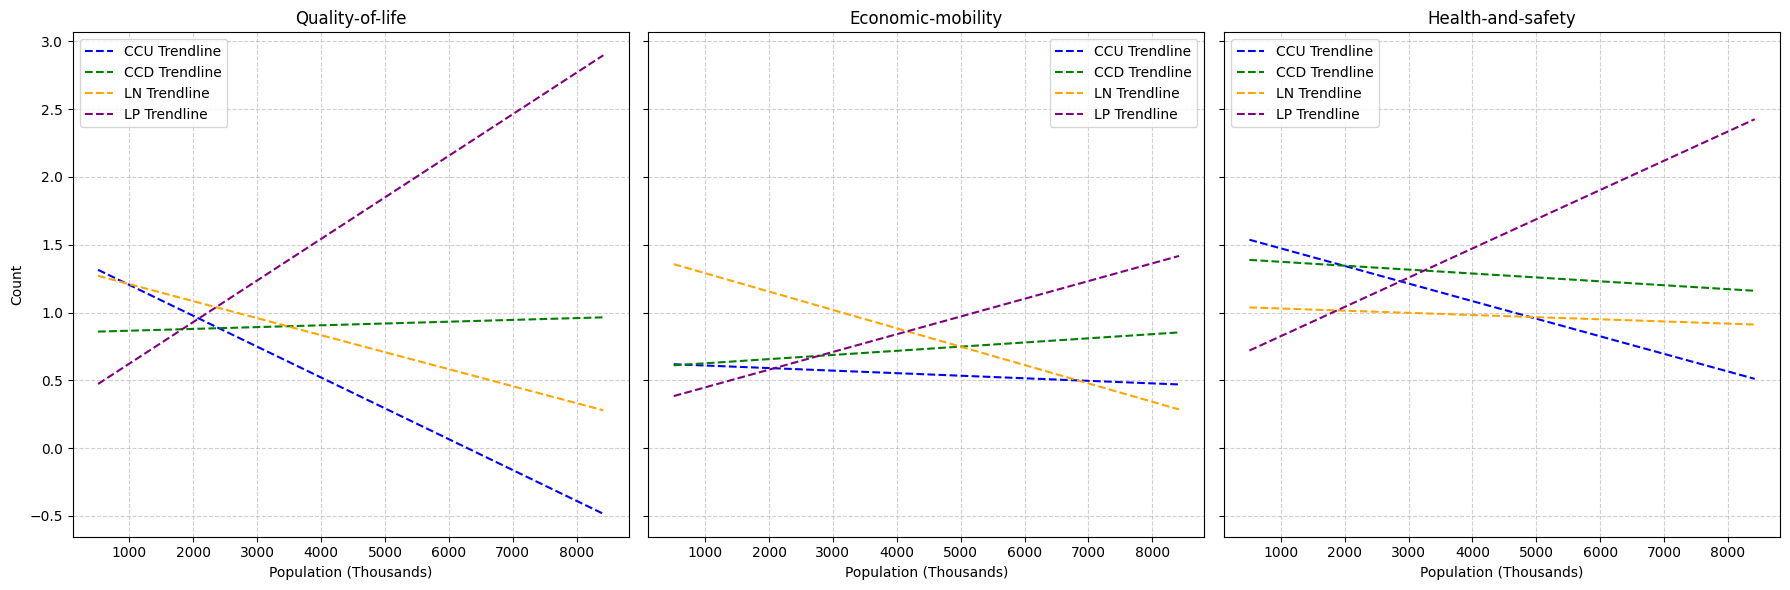

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Initialize subplots for the three amenities
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of amenities (metrics)
amenities = ["quality-of-life", "economic-mobility", "health-and-safety"]

trendlines = ["CCU", "CCD", "LN", "LP"]

# Colors for each category
colors = {"CCU": "blue", "CCD": "green", "LN": "orange", "LP": "purple"}

# Iterate over each amenity to create a subplot
for i, amenity in enumerate(amenities):
    ax = axs[i]
    
    # Filter data for the current amenity
    test_df = df_sorted.loc[:, df_sorted.columns.get_level_values('Metric').isin([amenity, 'Population'])]
    test_df = test_df.loc[:, test_df.columns.get_level_values("Category").isin(trendlines + [''])]

    # Plot trendlines for each category
    for category in trendlines:
        # Extract population and values for the category
        populations = test_df["Population"].values
        values = test_df[(amenity, category)].values.flatten()

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(populations, values)

        # Generate trendline
        trendline = slope * populations + intercept
        ax.plot(populations, trendline, color=colors[category], linestyle='--', label=f"{category} Trendline")
        
        # Print statistical results
        print(f"{amenity} - {category}:")
        print(f"  Slope: {slope:.3f}")
        print(f"  Intercept: {intercept:.3f}")
        print(f"  R-squared: {r_value**2:.3f}")
        print(f"  P-value: {p_value:.3e}")
        print(f"  Std Err: {std_err:.3f}")
    
    # Customize the subplot
    ax.set_title(f"{amenity.capitalize()}")
    ax.set_xlabel("Population (Thousands)")
    if i == 0:
        ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [26]:
# cities_to_region = {
#     "newyork": "Northeast",
#     "losangeles": "West",
#     "chicago": "Midwest",
#     "houston": "Southwest",
#     "phoenix": "Southwest",
#     "philadelphia": "Northeast",
#     "sanantonio": "Southwest",
#     "sandiego": "West",
#     "dallas": "Southwest",
#     "jacksonville": "Southeast",
#     "austin": "Southwest",
#     "fortworth": "Southwest",
#     "sanjose": "West",
#     "columbus": "Midwest",
#     "charlotte": "Southeast",
#     "indianapolis": "Midwest",
#     "sanfrancisco": "West",
#     "seattle": "West",
#     "denver": "West",
#     "oklahomacity": "Southwest",
#     "nashville": "Southeast",
#     "washington": "Northeast",
#     "elpaso": "Southwest",
#     "lasvegas": "West",
#     "boston": "Northeast",
#     "detroit": "Midwest",
#     "portland": "West",
#     "louisville": "Midwest",
#     "memphis": "Southeast",
#     "baltimore": "Northeast",
#     "milwaukee": "Midwest",
#     "albuquerque": "Southwest",
#     "tucson": "Southwest",
#     "fresno": "West",
#     "sacramento": "West",
#     "mesa": "Southwest",
#     "atlanta": "Southeast",
#     "kansascity": "Midwest"
# }

# Approximate distances (in miles) from Los Angeles, CA
cities_to_distance = {
    "newyork": 2790,
    "losangeles": 0,
    "chicago": 2015,
    "houston": 1540,
    "phoenix": 370,
    "philadelphia": 2720,
    "sanantonio": 1350,
    "sandiego": 120,
    "dallas": 1435,
    "jacksonville": 2410,
    "austin": 1375,
    "fortworth": 1410,
    "sanjose": 340,
    "columbus": 2240,
    "charlotte": 2430,
    "indianapolis": 2060,
    "sanfrancisco": 380,
    "seattle": 960,
    "denver": 1020,
    "oklahomacity": 1320,
    "nashville": 2100,
    "washington": 2680,
    "elpaso": 800,
    "lasvegas": 270,
    "boston": 2990,
    "detroit": 2280,
    "portland": 970,
    "louisville": 2120,
    "memphis": 1815,
    "baltimore": 2690,
    "milwaukee": 2040,
    "albuquerque": 790,
    "tucson": 485,
    "fresno": 230,
    "sacramento": 380,
    "mesa": 370,
    "atlanta": 2180,
    "kansascity": 1600,
}

In [27]:
# Add founding date as a new column
df_pivot["Distance"] = df_pivot.index.get_level_values("City").map(cities_to_distance)

# Sort by the founding date
df_sorted = df_pivot.reset_index().sort_values(by="Distance").set_index(["City"])

# Display the sorted DataFrame
df_sorted.head()

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCU               CCU               CCU   
City                                                             
losangeles               0                 0                 2   
sandiego                 0                 1                 1   
fresno                   1                 0                 2   
lasvegas                 1                 1                 2   
sanjose                  1                 1                 0   

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCD               CCD               CCD   
City                                                             
losangeles               0                 0                 1   
sandiego                 1                 0                 1   
fresno                   0                 0                 0   
lasvegas                 1                 1                 1   
sanjose                  0                 1                 2   

Metric     quality-of-life economic-mobility health-and-safety  \
Category                LP                LP                LP   
City                                                             
losangeles               2                 1                 2   
sandiego                 1                 0                 1   
fresno                   1                 1                 1   
lasvegas                 1                 0                 1   
sanjose                  1                 0                 0   

Metric     quality-of-life economic-mobility health-and-safety Founding Date  \
Category                LN                LN                LN                 
City                                                                           
losangeles               1                 2                 0          1781   
sandiego                 2                 2                 1          1769   
fresno                   2                 2                 1          1872   
lasvegas                 1                 1                 1          1905   
sanjose                  2                 1                 3          1777   

Metric     Population Distance  
Category                        
City                            
losangeles       3985        0  
sandiego         1424      120  
fresno            545      230  
lasvegas          675      270  
sanjose          1021      340

quality-of-life - CCU:
  Slope: 0.000
  Intercept: 0.650
  R-squared: 0.118
  P-value: 3.512e-02
  Std Err: 0.000
quality-of-life - CCD:
  Slope: -0.000
  Intercept: 1.010
  R-squared: 0.014
  P-value: 4.794e-01
  Std Err: 0.000
quality-of-life - LN:
  Slope: -0.000
  Intercept: 1.552
  R-squared: 0.097
  P-value: 5.690e-02
  Std Err: 0.000
quality-of-life - LP:
  Slope: 0.000
  Intercept: 0.595
  R-squared: 0.006
  P-value: 6.402e-01
  Std Err: 0.000
economic-mobility - CCU:
  Slope: -0.000
  Intercept: 0.653
  R-squared: 0.002
  P-value: 7.975e-01
  Std Err: 0.000
economic-mobility - CCD:
  Slope: 0.000
  Intercept: 0.525
  R-squared: 0.010
  P-value: 5.604e-01
  Std Err: 0.000
economic-mobility - LN:
  Slope: -0.000
  Intercept: 1.650
  R-squared: 0.083
  P-value: 7.872e-02
  Std Err: 0.000
economic-mobility - LP:
  Slope: 0.000
  Intercept: 0.178
  R-squared: 0.080
  P-value: 8.524e-02
  Std Err: 0.000
health-and-safety - CCU:
  Slope: -0.000
  Intercept: 1.612
  R-squared: 0.009
 

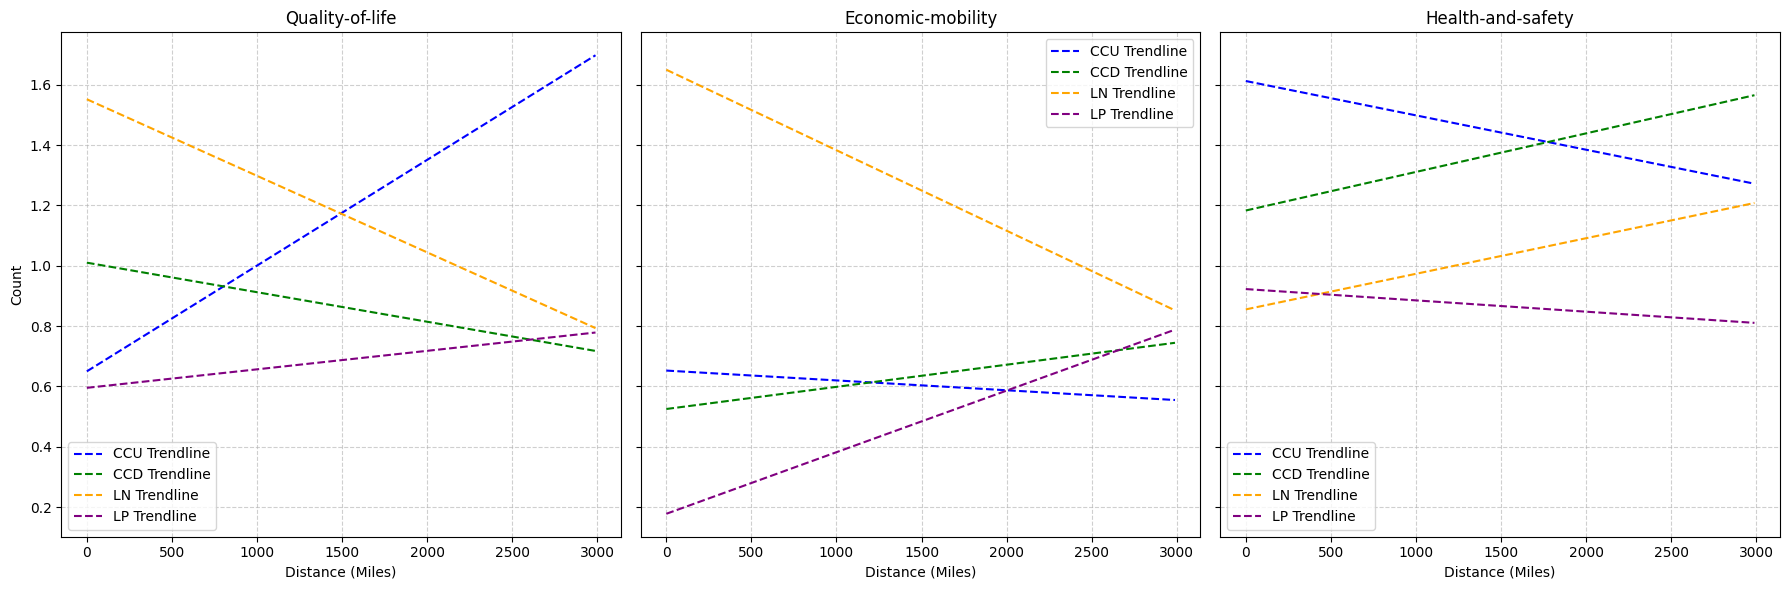

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Initialize subplots for the three amenities
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of amenities (metrics)
amenities = ["quality-of-life", "economic-mobility", "health-and-safety"]

# Colors for each category
colors = {"CCU": "blue", "CCD": "green", "LN": "orange", "LP": "purple"}

# Iterate over each amenity to create a subplot
for i, amenity in enumerate(amenities):
    ax = axs[i]
    
    # Filter data for the current amenity
    test_df = df_sorted.loc[:, df_sorted.columns.get_level_values('Metric').isin([amenity, 'Distance'])]
    test_df = test_df.loc[:, test_df.columns.get_level_values("Category").isin(trendlines + [''])]
    
    # Plot trendlines for each category
    for category in trendlines:
        # Extract founding dates (Distance) and values for the category
        founding_dates = test_df["Distance"].values
        values = test_df[(amenity, category)].values.flatten()

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(founding_dates, values)
        
        # Generate trendline
        trendline = slope * founding_dates + intercept
        ax.plot(founding_dates, trendline, color=colors[category], linestyle='--', label=f"{category} Trendline")
        
        # Display statistical information in console
        print(f"{amenity} - {category}:")
        print(f"  Slope: {slope:.3f}")
        print(f"  Intercept: {intercept:.3f}")
        print(f"  R-squared: {r_value**2:.3f}")
        print(f"  P-value: {p_value:.3e}")
        print(f"  Std Err: {std_err:.3f}")
    
    # Customize the subplot
    ax.set_title(f"{amenity.capitalize()}")
    ax.set_xlabel("Distance (Miles)")
    if i == 0:
        ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [29]:
# from Census table B19083
cities_to_gini = {
    "newyork": 0.515,
    "losangeles": 0.4879,
    "chicago": 0.4798,
    "houston": 0.4809,
    "phoenix": 0.4564,
    "philadelphia": 0.4824,
    "sanantonio": 0.4591,
    "sandiego": 0.4587,
    "dallas": 0.4664,
    "jacksonville": 0.4746,
    "austin": 0.4734,
    "fortworth": 0.4664,
    "sanjose": 0.4811,
    "columbus": 0.4641,
    "charlotte": 0.4752,
    "indianapolis": 0.4572,
    "sanfrancisco": 0.4985,
    "seattle": 0.4688,
    "denver": 0.4518,
    "oklahomacity": 0.4734,
    "nashville": 0.4624,
    "washington": 0.4472,
    "elpaso": 0.4652,
    "lasvegas": 0.4657,
    "boston": 0.4836,
    "detroit": 0.4738,
    "portland": 0.4490,
    "louisville": 0.4651,
    "memphis": 0.4756,
    "baltimore": 0.4623,
    "milwaukee": 0.4771,
    "albuquerque": 0.46,
    "tucson": 0.4667,
    "fresno": 0.4695,
    "sacramento": 0.4510,
    "mesa": 0.4564,
    "atlanta": 0.4679,
    "kansascity": 0.4507,
}

In [30]:
# Add founding date as a new column
df_pivot["Gini"] = df_pivot.index.get_level_values("City").map(cities_to_gini)

# Sort by the founding date
df_sorted = df_pivot.reset_index().sort_values(by="Distance").set_index(["City"])

# Display the sorted DataFrame
df_sorted.head()

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCU               CCU               CCU   
City                                                             
losangeles               0                 0                 2   
sandiego                 0                 1                 1   
fresno                   1                 0                 2   
lasvegas                 1                 1                 2   
sanjose                  1                 1                 0   

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCD               CCD               CCD   
City                                                             
losangeles               0                 0                 1   
sandiego                 1                 0                 1   
fresno                   0                 0                 0   
lasvegas                 1                 1                 1   
sanjose                  0                 1                 2   

Metric     quality-of-life economic-mobility health-and-safety  \
Category                LP                LP                LP   
City                                                             
losangeles               2                 1                 2   
sandiego                 1                 0                 1   
fresno                   1                 1                 1   
lasvegas                 1                 0                 1   
sanjose                  1                 0                 0   

Metric     quality-of-life economic-mobility health-and-safety Founding Date  \
Category                LN                LN                LN                 
City                                                                           
losangeles               1                 2                 0          1781   
sandiego                 2                 2                 1          1769   
fresno                   2                 2                 1          1872   
lasvegas                 1                 1                 1          1905   
sanjose                  2                 1                 3          1777   

Metric     Population Distance    Gini  
Category                                
City                                    
losangeles       3985        0  0.4879  
sandiego         1424      120  0.4587  
fresno            545      230  0.4695  
lasvegas          675      270  0.4657  
sanjose          1021      340  0.4811

quality-of-life - CCU:
  Slope: -17.193
  Intercept: 9.221
  R-squared: 0.068
  P-value: 1.142e-01
  Std Err: 10.622
quality-of-life - CCD:
  Slope: -0.677
  Intercept: 1.186
  R-squared: 0.000
  P-value: 9.398e-01
  Std Err: 8.904
quality-of-life - LN:
  Slope: -0.237
  Intercept: 1.295
  R-squared: 0.000
  P-value: 9.786e-01
  Std Err: 8.765
quality-of-life - LP:
  Slope: 20.285
  Intercept: -8.829
  R-squared: 0.161
  P-value: 1.252e-02
  Std Err: 7.717
economic-mobility - CCU:
  Slope: -11.586
  Intercept: 6.039
  R-squared: 0.056
  P-value: 1.525e-01
  Std Err: 7.927
economic-mobility - CCD:
  Slope: -5.504
  Intercept: 3.213
  R-squared: 0.013
  P-value: 4.985e-01
  Std Err: 8.050
economic-mobility - LN:
  Slope: 5.114
  Intercept: -1.135
  R-squared: 0.007
  P-value: 6.089e-01
  Std Err: 9.907
economic-mobility - LP:
  Slope: 12.896
  Intercept: -5.574
  R-squared: 0.077
  P-value: 9.255e-02
  Std Err: 7.463
health-and-safety - CCU:
  Slope: -18.935
  Intercept: 10.327
  R-squar

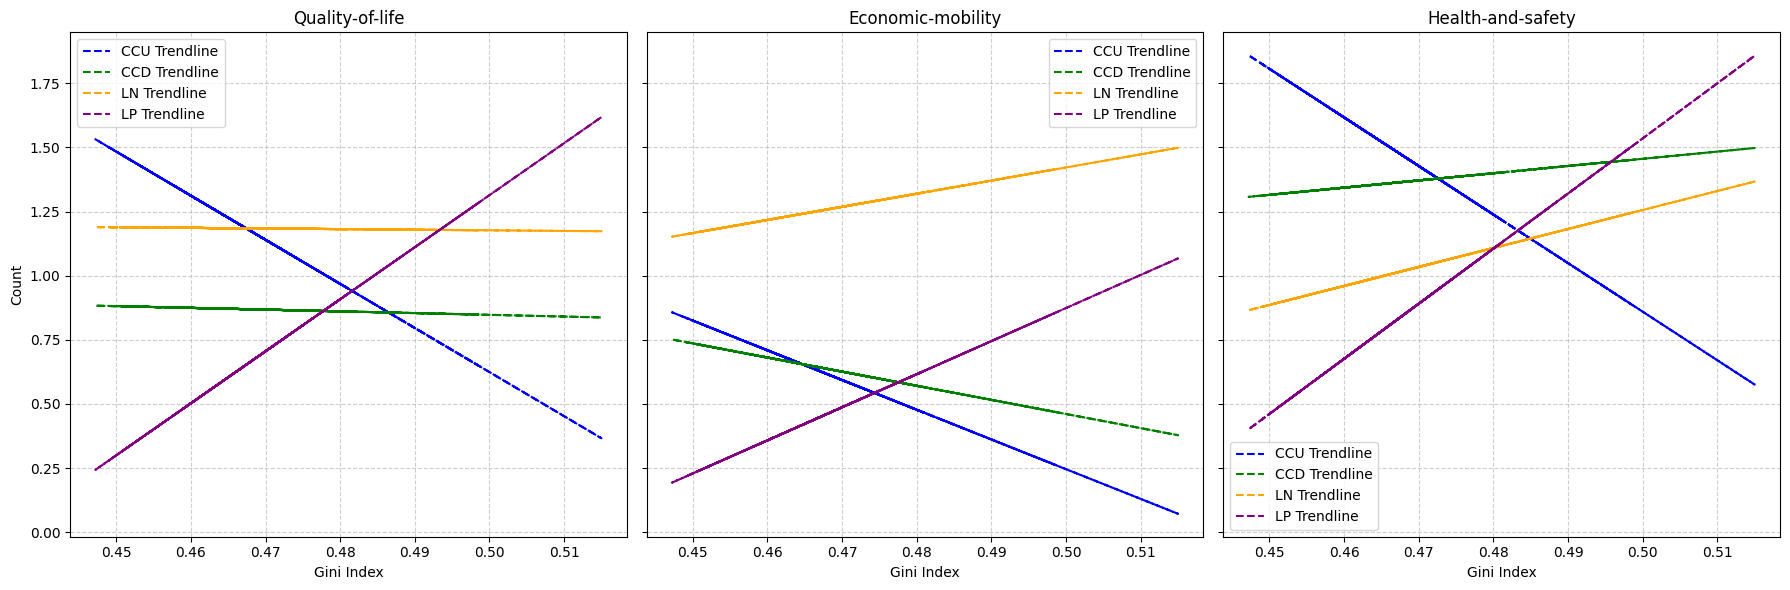

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Initialize subplots for the three amenities
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of amenities (metrics)
amenities = ["quality-of-life", "economic-mobility", "health-and-safety"]

# Colors for each category
colors = {"CCU": "blue", "CCD": "green", "LN": "orange", "LP": "purple"}

# Iterate over each amenity to create a subplot
for i, amenity in enumerate(amenities):
    ax = axs[i]
    
    # Filter data for the current amenity
    test_df = df_sorted.loc[:, df_sorted.columns.get_level_values('Metric').isin([amenity, 'Gini'])]
    test_df = test_df.loc[:, test_df.columns.get_level_values("Category").isin(trendlines + [''])]
    
    # Plot trendlines for each category
    for category in trendlines:
        # Extract founding dates (Distance) and values for the category
        founding_dates = test_df["Gini"].values
        values = test_df[(amenity, category)].values.flatten()

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(founding_dates, values)
        
        # Generate trendline
        trendline = slope * founding_dates + intercept
        ax.plot(founding_dates, trendline, color=colors[category], linestyle='--', label=f"{category} Trendline")
        
        # Display statistical information in console
        print(f"{amenity} - {category}:")
        print(f"  Slope: {slope:.3f}")
        print(f"  Intercept: {intercept:.3f}")
        print(f"  R-squared: {r_value**2:.3f}")
        print(f"  P-value: {p_value:.3e}")
        print(f"  Std Err: {std_err:.3f}")
    
    # Customize the subplot
    ax.set_title(f"{amenity.capitalize()}")
    ax.set_xlabel("Gini Index")
    if i == 0:
        ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

newyork done!


/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packag

losangeles done!
chicago done!
houston done!
phoenix done!
philadelphia done!
sanantonio done!
sandiego done!
dallas done!
jacksonville done!
austin done!
fortworth done!
sanjose done!
columbus done!
charlotte done!
indianapolis done!
sanfrancisco done!


/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)


seattle done!
denver done!
oklahomacity done!
nashville done!
washington done!
elpaso done!
lasvegas done!
boston done!
detroit done!
portland done!


/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/n/home11/gleblanc/.conda/envs/OOD_env/lib/python3.11/site-packag

louisville done!
memphis done!
baltimore done!
milwaukee done!
albuquerque done!
tucson done!
fresno done!
sacramento done!
mesa done!
atlanta done!
kansascity done!


/tmp/ipykernel_1930984/1547122702.py:106: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


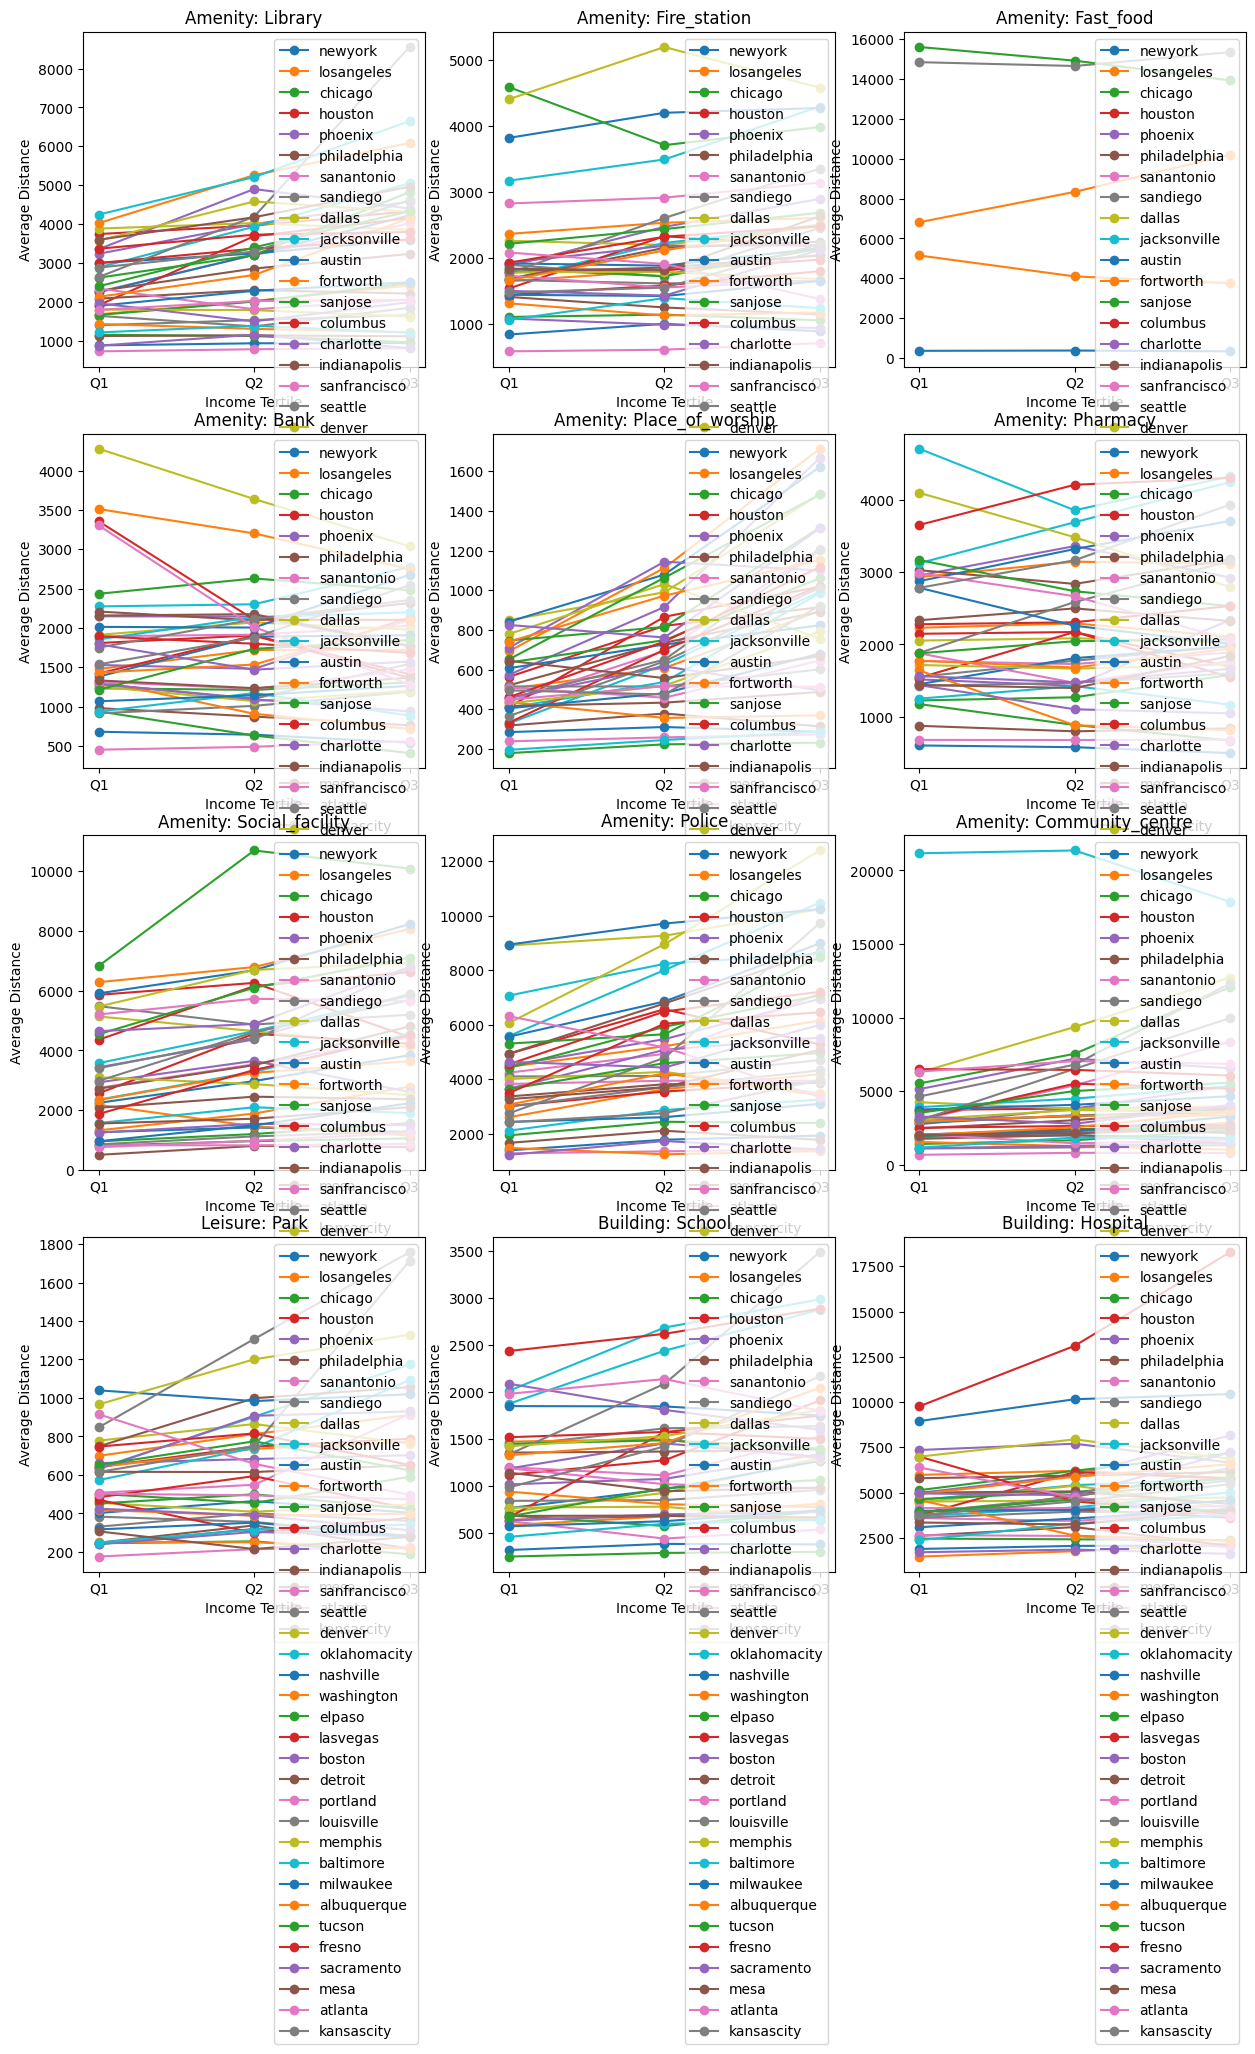

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import geopandas as gpd
from shapely.wkt import loads as wkt_loads

# Function to calculate minimum distances with sampling
def calculate_min_distances_block_group(df, categories, block_group_column="GEO_ID"):
    projected_crs = "EPSG:3857"
    results = {}
    
    # Convert WKT text to shapely geometry objects only if necessary
    if df["geometry"].dtype == "object":  # If geometry might contain mixed types
        df["geometry"] = df["geometry"].apply(
            lambda geom: wkt_loads(geom) if isinstance(geom, str) else geom
        )

    df = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

    # Reproject to the projected CRS for distance calculations
    df = df.to_crs(projected_crs)

    for category, items in categories.items():
        category_results = {}
        for item in items:
            # Filter amenities by category and item
            amenities = df[df[category] == item]
            amenities = gpd.GeoDataFrame(amenities, geometry="geometry").to_crs(projected_crs)
            amenities["geometry"] = amenities["geometry"].apply(
                lambda geom: geom.centroid if geom.geom_type == "Polygon" else geom
            )
            
            # Filter residential buildings for distance calculation
            residential_buildings = df[
                (df["building"].isin(["residential", "house", "apartments"])) |  # Residential buildings
                (df["landuse"] == "residential")  # Residential landuse
            ].copy()
            
            # Randomly sample one residence per block group
            sampled_residences = residential_buildings.groupby(block_group_column).sample(n=1, random_state=42)

            # Compute minimum distance from sampled residences to each amenity
            sampled_residences[f"min_dist_to_{item}"] = sampled_residences["geometry"].apply(
                lambda geom: amenities.distance(geom).min() if not amenities.empty else float("inf")
            )

            # Calculate average distance per block group
            block_group_avg = sampled_residences.groupby(block_group_column, observed=False).agg(
                avg_dist=(f"min_dist_to_{item}", "mean"),
                income_range=("income_range", "first")
            ).reset_index()

            # Aggregate by income range
            income_range_avg = block_group_avg.groupby("income_range", observed=False).agg(
                avg_dist=("avg_dist", "mean")
            ).reset_index()

            # Store the results
            category_results[item] = income_range_avg
        results[category] = category_results
    return results

# Function to prepare data for graphing
def prepare_distance_data(results_dict, categories):
    results = {}
    for category, items in categories.items():
        category_results = {}
        for item in items:
            if item in results_dict[category]:
                category_results[item] = results_dict[category][item]
        results[category] = category_results
    return results

# Generalized plotting function
def plot_distance_graphs(results_by_city, categories, city_names):
    total_items = sum(len(items) for items in categories.values())
    cols = 3
    rows = math.ceil(total_items / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(15, rows * 5))
    #fig.suptitle("Average Minimum Distance to Each Amenity by Income Quintile for Multiple Cities")

    plot_index = 0

    for category, items in categories.items():
        for item in items:
            row = plot_index // cols
            col = plot_index % cols
            ax = axs[row, col] if rows > 1 else axs[col]

            for city_name, city_results in results_by_city.items():
                if item in city_results[category]:
                    data = city_results[category][item]
                    ax.plot(data["income_range"], data.iloc[:, 1], marker='o', linestyle='-', label=city_name)

            ax.set_title(f"{category.capitalize()}: {item.capitalize()}")
            ax.set_xlabel("Income Tertile")
            ax.set_ylabel("Average Distance")
            ax.legend()
            plot_index += 1

    for j in range(plot_index, rows * cols):
        fig.delaxes(axs[j // cols, j % cols])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Define categories
categories = {
    "amenity": ["library", "fire_station", "fast_food", "bank", "place_of_worship", "pharmacy", "social_facility", "police", "community_centre"],
    "leisure": ["park"],
    "building": ["school", "hospital"]
}

# List of city dataframes
city_names = list(cities_to_ids.keys())

results_by_city = {}
for city_name in city_names:
    df = dataframes[city_name]
    results_by_city[city_name] = calculate_min_distances_block_group(df, categories, block_group_column="GEO_ID")
    print(city_name, "done!")

# Prepare data for graphing
prepared_results = {
    city_name: prepare_distance_data(results, categories)
    for city_name, results in results_by_city.items()
}

# Plot the results
plot_distance_graphs(prepared_results, categories, city_names)


Could also later on do the "service walk index"? But for now just looking at distance to a given type of entity. 

Do differences correspond to certain levels of income inequality?

is there something with more residences stored?

normalization based on apartment size? --> or number of units

have to acknowledge that we're clearly missing some residences

TODO: consider replacing fast food with something else.. like grocery store? idk

can also do different kinds of social facilities...

In [33]:
classifications = {
    "quality-of-life": {
        "amenity": ["library", "place_of_worship", "fast_food"],
        "building": [],
        "leisure": ["park"]
    },
    "economic-mobility": {
        "amenity": ["social_facility", "bank", "community_centre"],
        "building": [],
        "leisure": ["school"]
    },
    "health-and-safety": {
        "amenity": ["fire_station", "police", "pharmacy"],
        "building": ["hospital"],
        "leisure": []
    }
}

In [34]:
city_names = cities_to_ids.keys()

categories = {
    "amenity": ["library", "fire_station", "fast_food", "bank", "place_of_worship", "pharmacy", "social_facility", "police", "community_centre"],
    "leisure": ["park"],
    "building": ["school", "hospital"]
}

class_counts = {}

for city in city_names:
    class_counts[city] = {
        "CCU": {
            "quality-of-life": 0,
            "economic-mobility": 0,
            "health-and-safety": 0,
        },
        "CCD": {
            "quality-of-life": 0,
            "economic-mobility": 0,
            "health-and-safety": 0,
        },
        "LP": {
            "quality-of-life": 0,
            "economic-mobility": 0,
            "health-and-safety": 0,
        },
        "LN": {
            "quality-of-life": 0,
            "economic-mobility": 0,
            "health-and-safety": 0,
        }
    }
    
    for category, items in categories.items():
        for item in items:
            distances = list(prepared_results[city][category][item]["avg_dist"])
            q1 = distances[0]
            q2 = distances[1]
            q3 = distances[2]
            
            if item in classifications["quality-of-life"][category]:
                purpose = "quality-of-life"
            elif item in classifications["economic-mobility"][category]:
                purpose = "economic-mobility"
            else:
                purpose = "health-and-safety"
            
            if q1 > q2 < q3:
                class_counts[city]["CCU"][purpose] += 1
            elif q1 < q2 > q3:
                class_counts[city]["CCD"][purpose] += 1
            elif q1 < q2 < q3:
                class_counts[city]["LP"][purpose] += 1
            elif q1 > q2 > q3:
                class_counts[city]["LN"][purpose] += 1

In [35]:
mux = pd.MultiIndex.from_product([city_names, ["CCU", "CCD", "LP", "LN"], ["quality-of-life", "economic-mobility", "health-and-safety"]])
df = pd.DataFrame(class_counts, columns=mux)

In [36]:
# Flatten the nested dictionary into a DataFrame-friendly format
flattened_data = []

for city, categories in class_counts.items():
    for category, metrics in categories.items():
        for metric, value in metrics.items():
            flattened_data.append((city, category, metric, value))

# Convert to a DataFrame
df = pd.DataFrame(flattened_data, columns=["City", "Category", "Metric", "Value"])

# Pivot to create MultiIndex columns
df_pivot = df.pivot(index="City", columns=["Metric", "Category"], values="Value")

# Display the resulting DataFrame
df_pivot

Metric       quality-of-life economic-mobility health-and-safety  \
Category                 CCU               CCU               CCU   
City                                                               
albuquerque                1                 0                 1   
atlanta                    0                 0                 0   
austin                     0                 0                 1   
baltimore                  0                 0                 0   
boston                     0                 0                 0   
charlotte                  0                 0                 0   
chicago                    0                 0                 0   
columbus                   0                 0                 0   
dallas                     0                 1                 1   
denver                     1                 1                 1   
detroit                    1                 0                 0   
elpaso                     0                 0                 1   
fortworth                  0                 0                 0   
fresno                     0                 0                 0   
houston                    0                 0                 0   
indianapolis               0                 1                 1   
jacksonville               0                 0                 1   
kansascity                 1                 0                 0   
lasvegas                   1                 0                 0   
losangeles                 0                 0                 0   
louisville                 0                 0                 0   
memphis                    0                 0                 0   
mesa                       2                 1                 4   
milwaukee                  0                 0                 1   
nashville                  1                 1                 0   
newyork                    0                 0                 0   
oklahomacity               0                 0                 0   
philadelphia               0                 0                 1   
phoenix                    0                 1                 1   
portland                   2                 2                 3   
sacramento                 2                 2                 4   
sanantonio                 0                 0                 3   
sandiego                   1                 2                 1   
sanfrancisco               0                 1                 2   
sanjose                    1                 1                 2   
seattle                    1                 0                 1   
tucson                     0                 0                 0   
washington                 1                 0                 2   

Metric       quality-of-life economic-mobility health-and-safety  \
Category                 CCD               CCD               CCD   
City                                                               
albuquerque                0                 0                 1   
atlanta                    1                 2                 1   
austin                     1                 0                 0   
baltimore                  1                 3                 2   
boston                     3                 1                 2   
charlotte                  2                 2                 3   
chicago                    1                 0                 2   
columbus                   1                 3                 4   
dallas                     2                 1                 1   
denver                     1                 1                 4   
detroit                    1                 3                 3   
elpaso                     1                 2                 1   
fortworth                  0                 0                 3   
fresno                     1                 0                 0   
houston                    0                 2         

In [37]:
# Flatten and sum the nested dictionary
category_counts = {"CCD": {}, "CCU": {}, "LP": {}, "LN": {}}

for city, categories in class_counts.items():
    
    city_totals = {}
    for category, metrics in categories.items():
        # Sum across all metrics for each category
        category_counts[category][city] = sum(metrics.values())

# Convert to DataFrame
counts_df = pd.DataFrame(category_counts)

# Display the DataFrame
counts_df


CCD  CCU  LP  LN
newyork         7    0   3   2
losangeles      1    0  11   0
chicago         3    0   4   4
houston         4    0   7   0
phoenix         0    2   9   0
philadelphia    8    1   0   2
sanantonio      0    3   8   0
sandiego        0    4   6   1
dallas          4    2   4   1
jacksonville    0    1  10   0
austin          1    1   9   0
fortworth       3    0   7   1
sanjose         0    4   7   1
columbus        8    0   3   0
charlotte       7    0   3   1
indianapolis    0    2   9   0
sanfrancisco    1    3   6   1
seattle         2    2   8   0
denver          6    3   0   2
oklahomacity    1    0  10   0
nashville       0    2   8   1
washington      0    3   0   9
elpaso          4    1   5   1
lasvegas        1    1   7   2
boston          6    0   2   3
detroit         7    1   3   0
portland        1    7   1   2
louisville      0    0  11   0
memphis         3    0   6   2
baltimore       6    0   5   0
milwaukee       1    1   8   1
albuquerque     1    2   8   0
tucson          2    0   9   0
fresno          1    0   8   2
sacramento      0    8   1   2
mesa            0    7   4   0
atlanta         4    0   1   6
kansascity      0    1  10   0

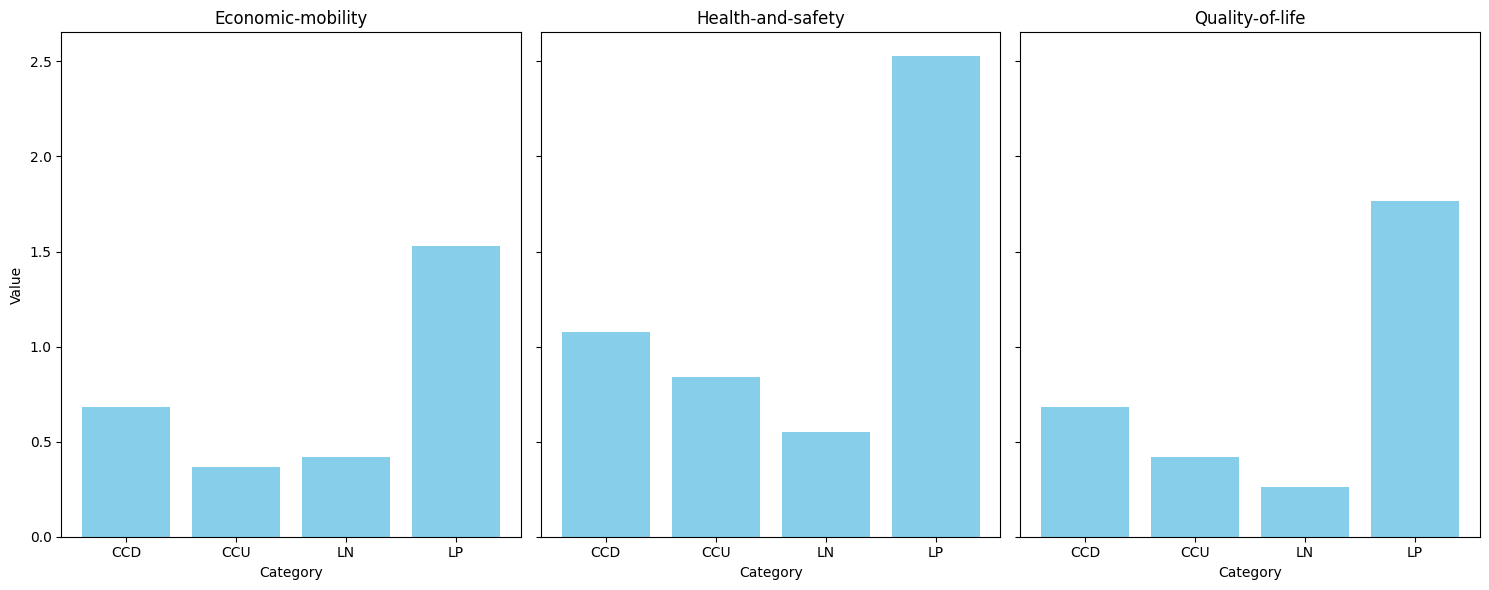

In [38]:
# Average the values grouped by Metric and Category
df_avg = df.groupby(["Metric", "Category"])["Value"].mean().reset_index()

# Unique metrics for separate subplots
metrics = df_avg["Metric"].unique()

# Create a grid of bar plots
fig, axs = plt.subplots(1, len(metrics), figsize=(15, 6), sharey=True)

for i, metric in enumerate(metrics):
    metric_data = df_avg[df_avg["Metric"] == metric]
    axs[i].bar(metric_data["Category"], metric_data["Value"], color='skyblue')
    axs[i].set_title(f"{metric.capitalize()}")
    axs[i].set_xlabel("Category")
    axs[i].set_ylabel("Value" if i == 0 else "")

plt.tight_layout()
plt.show()

In [39]:
cities_to_founding = {
    "newyork": 1624,
    "losangeles": 1781,
    "chicago": 1837,
    "houston": 1837,
    "phoenix": 1881,
    "philadelphia": 1682,
    "sanantonio": 1718,
    "sandiego": 1769,
    "dallas": 1841,
    "jacksonville": 1822,
    "austin": 1839,
    "fortworth": 1849, 
    "sanjose": 1777,
    "columbus": 1812,
    "charlotte": 1768,
    "indianapolis": 1821,
    "sanfrancisco": 1776,
    "seattle": 1851,
    "denver": 1858,
    "oklahomacity": 1889,
    "nashville": 1779,
    "washington": 1790,
    "elpaso": 1873,
    "lasvegas": 1905,
    "boston": 1630,
    "detroit": 1701,
    "portland": 1851,
    "louisville": 1778,
    "memphis": 1819,
    "baltimore": 1729,
    "milwaukee": 1846,
    "albuquerque": 1706,
    "tucson": 1775,
    "fresno": 1872,
    "sacramento": 1848,
    "mesa": 1878, 
    "atlanta": 1837,
    "kansascity": 1861
}

In [40]:
# Add founding date as a new column
df_pivot["Founding Date"] = df_pivot.index.get_level_values("City").map(cities_to_founding)

# Sort by the founding date
df_sorted = df_pivot.reset_index().sort_values(by="Founding Date").set_index(["City"])

# Display the sorted DataFrame
df_sorted.head()

Metric       quality-of-life economic-mobility health-and-safety  \
Category                 CCU               CCU               CCU   
City                                                               
newyork                    0                 0                 0   
boston                     0                 0                 0   
philadelphia               0                 0                 1   
detroit                    1                 0                 0   
albuquerque                1                 0                 1   

Metric       quality-of-life economic-mobility health-and-safety  \
Category                 CCD               CCD               CCD   
City                                                               
newyork                    3                 2                 2   
boston                     3                 1                 2   
philadelphia               3                 2                 3   
detroit                    1                 3                 3   
albuquerque                0                 0                 1   

Metric       quality-of-life economic-mobility health-and-safety  \
Category                  LP                LP                LP   
City                                                               
newyork                    1                 0                 2   
boston                     0                 1                 1   
philadelphia               0                 0                 0   
detroit                    1                 0                 2   
albuquerque                2                 3                 3   

Metric       quality-of-life economic-mobility health-and-safety Founding Date  
Category                  LN                LN                LN                
City                                                                            
newyork                    0                 1                 1          1624  
boston                     0                 1                 2          1630  
philadelphia               0                 1                 1          1682  
detroit                    0                 0                 0          1701  
albuquerque                0                 0                 0          1706

quality-of-life - CCU:
  Slope: 0.002
  Intercept: -2.649
  R-squared: 0.034
  P-value: 2.678e-01
  Std Err: 0.002
quality-of-life - CCD:
  Slope: -0.007
  Intercept: 12.778
  R-squared: 0.267
  P-value: 9.074e-04
  Std Err: 0.002
quality-of-life - LN:
  Slope: 0.001
  Intercept: -0.926
  R-squared: 0.006
  P-value: 6.488e-01
  Std Err: 0.001
quality-of-life - LP:
  Slope: 0.003
  Intercept: -4.142
  R-squared: 0.045
  P-value: 2.022e-01
  Std Err: 0.003
economic-mobility - CCU:
  Slope: 0.002
  Intercept: -2.720
  R-squared: 0.035
  P-value: 2.582e-01
  Std Err: 0.001
economic-mobility - CCD:
  Slope: -0.005
  Intercept: 9.886
  R-squared: 0.122
  P-value: 3.161e-02
  Std Err: 0.002
economic-mobility - LN:
  Slope: -0.000
  Intercept: 1.250
  R-squared: 0.002
  P-value: 7.801e-01
  Std Err: 0.002
economic-mobility - LP:
  Slope: 0.004
  Intercept: -5.417
  R-squared: 0.054
  P-value: 1.618e-01
  Std Err: 0.003
health-and-safety - CCU:
  Slope: 0.002
  Intercept: -3.121
  R-squared: 0.

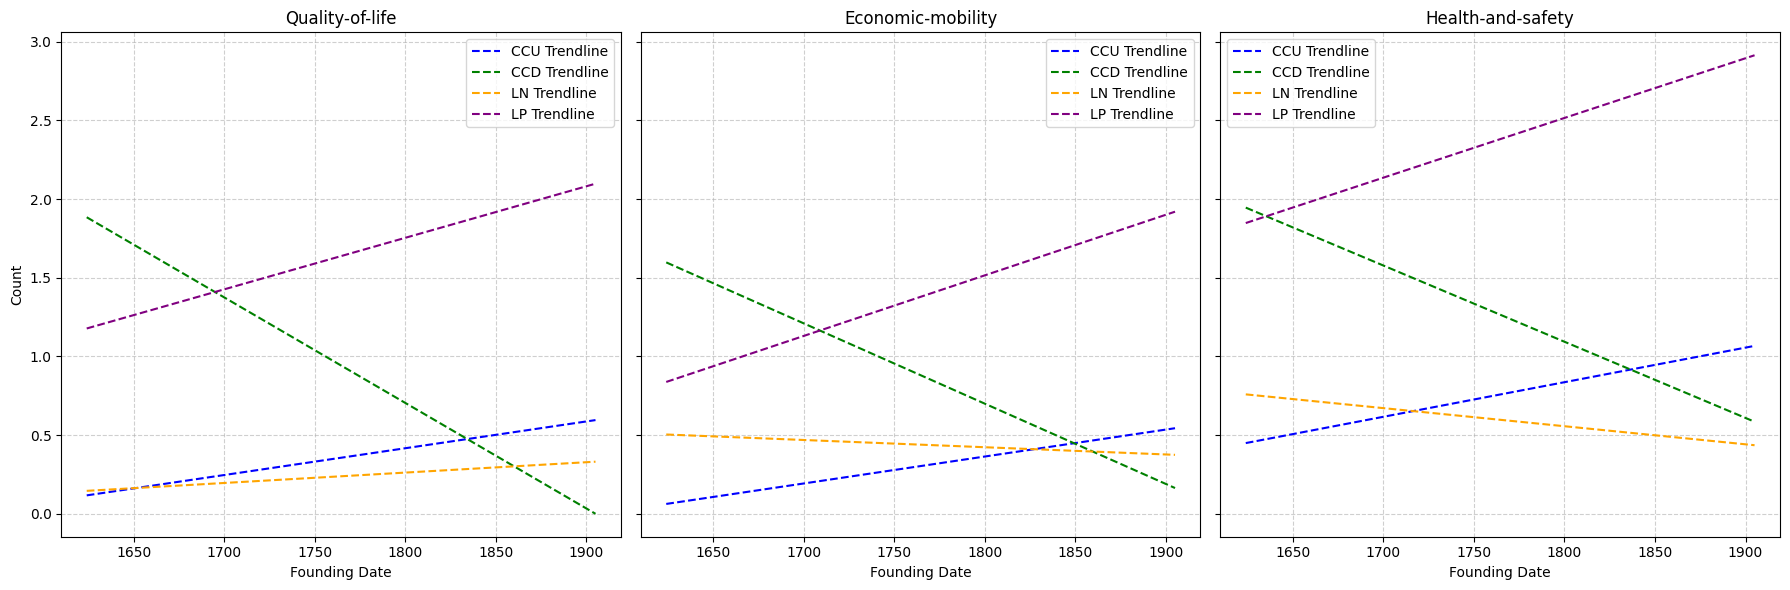

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Initialize subplots for the three amenities
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of amenities (metrics)
amenities = ["quality-of-life", "economic-mobility", "health-and-safety"]

trendlines = ["CCU", "CCD", "LN", "LP"]

# Colors for each category
colors = {"CCU": "blue", "CCD": "green", "LN": "orange", "LP": "purple"}

# Iterate over each amenity to create a subplot
for i, amenity in enumerate(amenities):
    ax = axs[i]
    
    # Filter data for the current amenity
    test_df = df_sorted.loc[:, df_sorted.columns.get_level_values('Metric').isin([amenity, 'Founding Date'])]
    test_df = test_df.loc[:, test_df.columns.get_level_values("Category").isin(trendlines + [''])]

    # Plot trendlines for each category
    for category in trendlines:
        # Extract founding dates and values for the category
        founding_dates = test_df["Founding Date"].values
        values = test_df[(amenity, category)].values.flatten()

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(founding_dates, values)

        # Generate trendline
        trendline = slope * founding_dates + intercept
        ax.plot(founding_dates, trendline, color=colors[category], linestyle='--', label=f"{category} Trendline")
        
        # Print statistical results
        print(f"{amenity} - {category}:")
        print(f"  Slope: {slope:.3f}")
        print(f"  Intercept: {intercept:.3f}")
        print(f"  R-squared: {r_value**2:.3f}")
        print(f"  P-value: {p_value:.3e}")
        print(f"  Std Err: {std_err:.3f}")
    
    # Customize the subplot
    ax.set_title(f"{amenity.capitalize()}")
    ax.set_xlabel("Founding Date")
    if i == 0:
        ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [42]:
cities_to_population = {
    "newyork": 8419,
    "losangeles": 3985,
    "chicago": 2716,
    "houston": 2320,
    "phoenix": 1703,
    "philadelphia": 1584,
    "sanantonio": 1548,
    "sandiego": 1424,
    "dallas": 1358,
    "jacksonville": 977,
    "austin": 978,
    "fortworth": 942,
    "sanjose": 1021,
    "columbus": 907,
    "charlotte": 912,
    "indianapolis": 887,
    "sanfrancisco": 815,
    "seattle": 773,
    "denver": 739,
    "oklahomacity": 701,
    "nashville": 691,
    "washington": 706,
    "elpaso": 681,
    "lasvegas": 675,
    "boston": 654,
    "detroit": 639,
    "portland": 654,
    "louisville": 627,
    "memphis": 621,
    "baltimore": 575,
    "milwaukee": 569,
    "albuquerque": 563,
    "tucson": 544,
    "fresno": 545,
    "sacramento": 524,
    "mesa": 526,
    "atlanta": 515,
    "kansascity": 508
}

In [43]:
# Add founding date as a new column
df_pivot["Population"] = df_pivot.index.get_level_values("City").map(cities_to_population)

# Sort by the founding date
df_sorted = df_pivot.reset_index().sort_values(by="Population").set_index(["City"])

# Display the sorted DataFrame
df_sorted.head()

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCU               CCU               CCU   
City                                                             
kansascity               1                 0                 0   
atlanta                  0                 0                 0   
sacramento               2                 2                 4   
mesa                     2                 1                 4   
tucson                   0                 0                 0   

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCD               CCD               CCD   
City                                                             
kansascity               0                 0                 0   
atlanta                  1                 2                 1   
sacramento               0                 0                 0   
mesa                     0                 0                 0   
tucson                   1                 0                 1   

Metric     quality-of-life economic-mobility health-and-safety  \
Category                LP                LP                LP   
City                                                             
kansascity               2                 3                 5   
atlanta                  1                 0                 0   
sacramento               0                 1                 0   
mesa                     1                 2                 1   
tucson                   2                 3                 4   

Metric     quality-of-life economic-mobility health-and-safety Founding Date  \
Category                LN                LN                LN                 
City                                                                           
kansascity               0                 0                 0          1861   
atlanta                  1                 1                 4          1837   
sacramento               1                 0                 1          1848   
mesa                     0                 0                 0          1878   
tucson                   0                 0                 0          1775   

Metric     Population  
Category               
City                   
kansascity        508  
atlanta           515  
sacramento        524  
mesa              526  
tucson            544

quality-of-life - CCU:
  Slope: -0.000
  Intercept: 0.555
  R-squared: 0.059
  P-value: 1.427e-01
  Std Err: 0.000
quality-of-life - CCD:
  Slope: 0.000
  Intercept: 0.415
  R-squared: 0.120
  P-value: 3.279e-02
  Std Err: 0.000
quality-of-life - LN:
  Slope: -0.000
  Intercept: 0.301
  R-squared: 0.005
  P-value: 6.621e-01
  Std Err: 0.000
quality-of-life - LP:
  Slope: 0.000
  Intercept: 1.712
  R-squared: 0.003
  P-value: 7.438e-01
  Std Err: 0.000
economic-mobility - CCU:
  Slope: -0.000
  Intercept: 0.432
  R-squared: 0.014
  P-value: 4.832e-01
  Std Err: 0.000
economic-mobility - CCD:
  Slope: 0.000
  Intercept: 0.545
  R-squared: 0.025
  P-value: 3.395e-01
  Std Err: 0.000
economic-mobility - LN:
  Slope: 0.000
  Intercept: 0.368
  R-squared: 0.008
  P-value: 5.904e-01
  Std Err: 0.000
economic-mobility - LP:
  Slope: -0.000
  Intercept: 1.655
  R-squared: 0.017
  P-value: 4.402e-01
  Std Err: 0.000
health-and-safety - CCU:
  Slope: -0.000
  Intercept: 1.012
  R-squared: 0.031
 

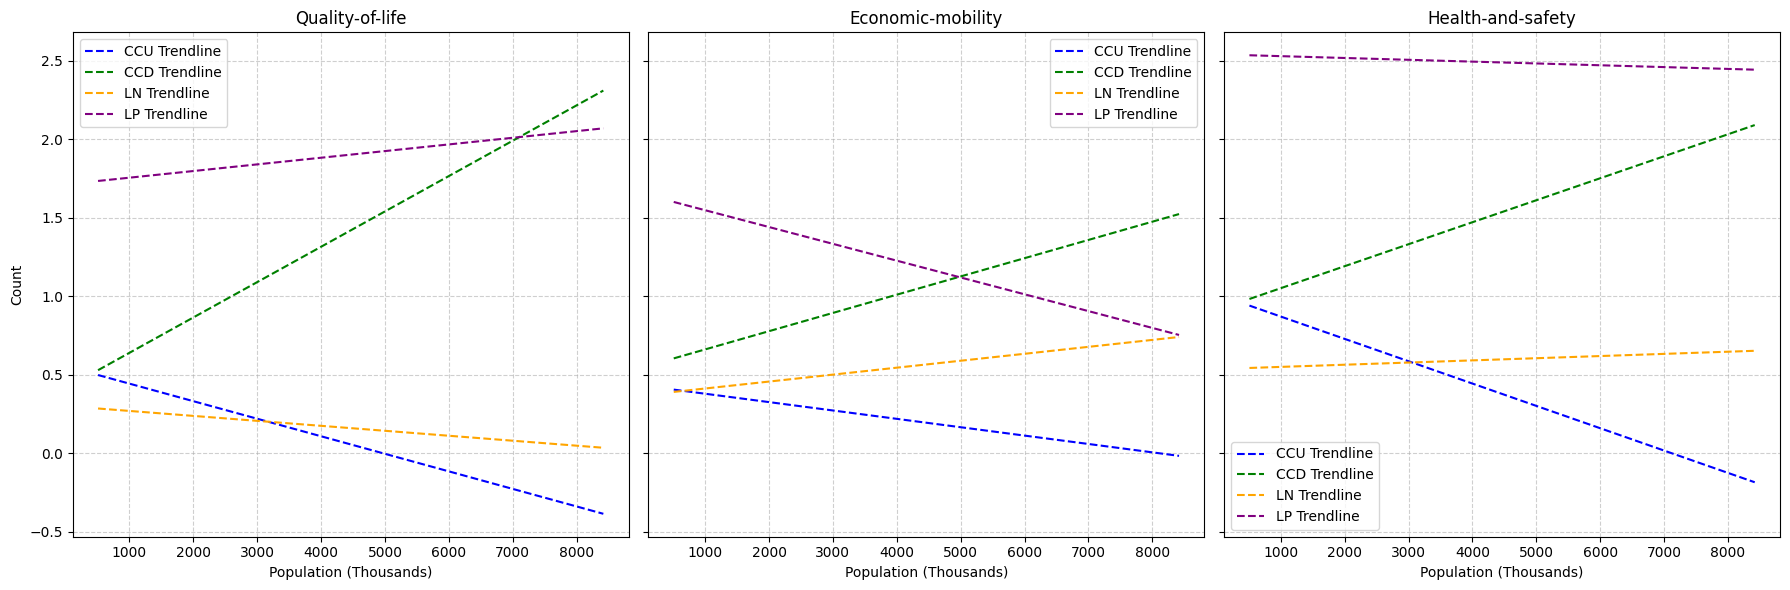

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Initialize subplots for the three amenities
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of amenities (metrics)
amenities = ["quality-of-life", "economic-mobility", "health-and-safety"]

trendlines = ["CCU", "CCD", "LN", "LP"]

# Colors for each category
colors = {"CCU": "blue", "CCD": "green", "LN": "orange", "LP": "purple"}

# Iterate over each amenity to create a subplot
for i, amenity in enumerate(amenities):
    ax = axs[i]
    
    # Filter data for the current amenity
    test_df = df_sorted.loc[:, df_sorted.columns.get_level_values('Metric').isin([amenity, 'Population'])]
    test_df = test_df.loc[:, test_df.columns.get_level_values("Category").isin(trendlines + [''])]

    # Plot trendlines for each category
    for category in trendlines:
        # Extract population and values for the category
        populations = test_df["Population"].values
        values = test_df[(amenity, category)].values.flatten()

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(populations, values)

        # Generate trendline
        trendline = slope * populations + intercept
        ax.plot(populations, trendline, color=colors[category], linestyle='--', label=f"{category} Trendline")
        
        # Print statistical results
        print(f"{amenity} - {category}:")
        print(f"  Slope: {slope:.3f}")
        print(f"  Intercept: {intercept:.3f}")
        print(f"  R-squared: {r_value**2:.3f}")
        print(f"  P-value: {p_value:.3e}")
        print(f"  Std Err: {std_err:.3f}")
    
    # Customize the subplot
    ax.set_title(f"{amenity.capitalize()}")
    ax.set_xlabel("Population (Thousands)")
    if i == 0:
        ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [45]:
cities_to_distance = {
    "newyork": 2790,
    "losangeles": 0,
    "chicago": 2015,
    "houston": 1540,
    "phoenix": 370,
    "philadelphia": 2720,
    "sanantonio": 1350,
    "sandiego": 120,
    "dallas": 1435,
    "jacksonville": 2410,
    "austin": 1375,
    "fortworth": 1410,
    "sanjose": 340,
    "columbus": 2240,
    "charlotte": 2430,
    "indianapolis": 2060,
    "sanfrancisco": 380,
    "seattle": 960,
    "denver": 1020,
    "oklahomacity": 1320,
    "nashville": 2100,
    "washington": 2680,
    "elpaso": 800,
    "lasvegas": 270,
    "boston": 2990,
    "detroit": 2280,
    "portland": 970,
    "louisville": 2120,
    "memphis": 1815,
    "baltimore": 2690,
    "milwaukee": 2040,
    "albuquerque": 790,
    "tucson": 485,
    "fresno": 230,
    "sacramento": 380,
    "mesa": 370,
    "atlanta": 2180,
    "kansascity": 1600,
}

In [46]:
# Add founding date as a new column
df_pivot["Distance"] = df_pivot.index.get_level_values("City").map(cities_to_distance)

# Sort by the founding date
df_sorted = df_pivot.reset_index().sort_values(by="Distance").set_index(["City"])

# Display the sorted DataFrame
df_sorted.head()

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCU               CCU               CCU   
City                                                             
losangeles               0                 0                 0   
sandiego                 1                 2                 1   
fresno                   0                 0                 0   
lasvegas                 1                 0                 0   
sanjose                  1                 1                 2   

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCD               CCD               CCD   
City                                                             
losangeles               0                 0                 1   
sandiego                 0                 0                 0   
fresno                   1                 0                 0   
lasvegas                 0                 0                 1   
sanjose                  0                 0                 0   

Metric     quality-of-life economic-mobility health-and-safety  \
Category                LP                LP                LP   
City                                                             
losangeles               4                 3                 4   
sandiego                 1                 1                 4   
fresno                   2                 1                 5   
lasvegas                 2                 2                 3   
sanjose                  2                 2                 3   

Metric     quality-of-life economic-mobility health-and-safety Founding Date  \
Category                LN                LN                LN                 
City                                                                           
losangeles               0                 0                 0          1781   
sandiego                 1                 0                 0          1769   
fresno                   0                 2                 0          1872   
lasvegas                 0                 1                 1          1905   
sanjose                  1                 0                 0          1777   

Metric     Population Distance  
Category                        
City                            
losangeles       3985        0  
sandiego         1424      120  
fresno            545      230  
lasvegas          675      270  
sanjose          1021      340

quality-of-life - CCU:
  Slope: -0.000
  Intercept: 0.791
  R-squared: 0.127
  P-value: 2.810e-02
  Std Err: 0.000
quality-of-life - CCD:
  Slope: 0.001
  Intercept: -0.080
  R-squared: 0.274
  P-value: 7.505e-04
  Std Err: 0.000
quality-of-life - LN:
  Slope: 0.000
  Intercept: 0.235
  R-squared: 0.001
  P-value: 8.643e-01
  Std Err: 0.000
quality-of-life - LP:
  Slope: -0.000
  Intercept: 2.209
  R-squared: 0.066
  P-value: 1.209e-01
  Std Err: 0.000
economic-mobility - CCU:
  Slope: -0.000
  Intercept: 0.821
  R-squared: 0.195
  P-value: 5.504e-03
  Std Err: 0.000
economic-mobility - CCD:
  Slope: 0.001
  Intercept: -0.097
  R-squared: 0.226
  P-value: 2.573e-03
  Std Err: 0.000
economic-mobility - LN:
  Slope: 0.000
  Intercept: 0.110
  R-squared: 0.079
  P-value: 8.639e-02
  Std Err: 0.000
economic-mobility - LP:
  Slope: -0.000
  Intercept: 2.166
  R-squared: 0.117
  P-value: 3.547e-02
  Std Err: 0.000
health-and-safety - CCU:
  Slope: -0.000
  Intercept: 1.501
  R-squared: 0.131

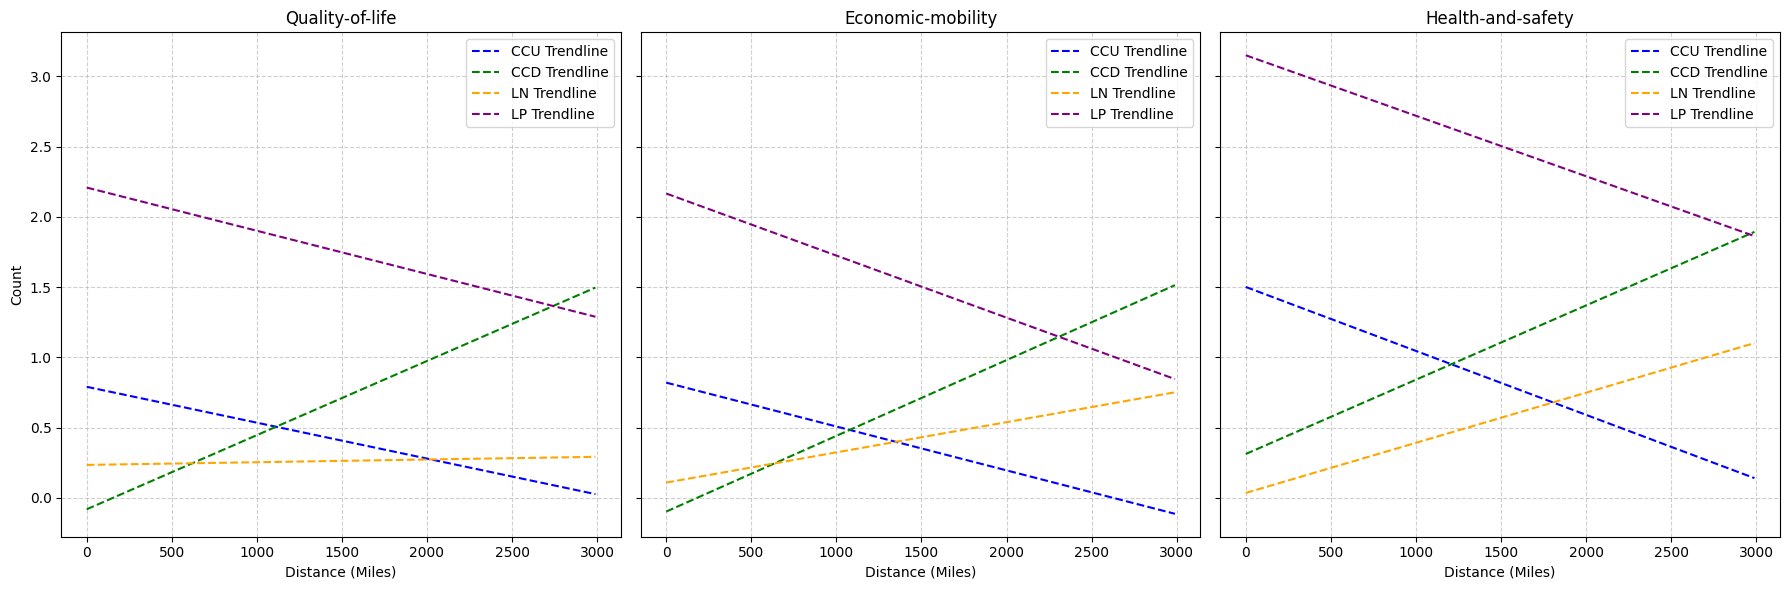

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Initialize subplots for the three amenities
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of amenities (metrics)
amenities = ["quality-of-life", "economic-mobility", "health-and-safety"]

# Colors for each category
colors = {"CCU": "blue", "CCD": "green", "LN": "orange", "LP": "purple"}

# Iterate over each amenity to create a subplot
for i, amenity in enumerate(amenities):
    ax = axs[i]
    
    # Filter data for the current amenity
    test_df = df_sorted.loc[:, df_sorted.columns.get_level_values('Metric').isin([amenity, 'Distance'])]
    test_df = test_df.loc[:, test_df.columns.get_level_values("Category").isin(trendlines + [''])]
    
    # Plot trendlines for each category
    for category in trendlines:
        # Extract founding dates (Distance) and values for the category
        founding_dates = test_df["Distance"].values
        values = test_df[(amenity, category)].values.flatten()

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(founding_dates, values)
        
        # Generate trendline
        trendline = slope * founding_dates + intercept
        ax.plot(founding_dates, trendline, color=colors[category], linestyle='--', label=f"{category} Trendline")
        
        # Display statistical information in console
        print(f"{amenity} - {category}:")
        print(f"  Slope: {slope:.3f}")
        print(f"  Intercept: {intercept:.3f}")
        print(f"  R-squared: {r_value**2:.3f}")
        print(f"  P-value: {p_value:.3e}")
        print(f"  Std Err: {std_err:.3f}")
    
    # Customize the subplot
    ax.set_title(f"{amenity.capitalize()}")
    ax.set_xlabel("Distance (Miles)")
    if i == 0:
        ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [48]:
# from Census table B19083
cities_to_gini = {
    "newyork": 0.515,
    "losangeles": 0.4879,
    "chicago": 0.4798,
    "houston": 0.4809,
    "phoenix": 0.4564,
    "philadelphia": 0.4824,
    "sanantonio": 0.4591,
    "sandiego": 0.4587,
    "dallas": 0.4664,
    "jacksonville": 0.4746,
    "austin": 0.4734,
    "fortworth": 0.4664,
    "sanjose": 0.4811,
    "columbus": 0.4641,
    "charlotte": 0.4752,
    "indianapolis": 0.4572,
    "sanfrancisco": 0.4985,
    "seattle": 0.4688,
    "denver": 0.4518,
    "oklahomacity": 0.4734,
    "nashville": 0.4624,
    "washington": 0.4472,
    "elpaso": 0.4652,
    "lasvegas": 0.4657,
    "boston": 0.4836,
    "detroit": 0.4738,
    "portland": 0.4490,
    "louisville": 0.4651,
    "memphis": 0.4756,
    "baltimore": 0.4623,
    "milwaukee": 0.4771,
    "albuquerque": 0.46,
    "tucson": 0.4667,
    "fresno": 0.4695,
    "sacramento": 0.4510,
    "mesa": 0.4564,
    "atlanta": 0.4679,
    "kansascity": 0.4507,
}

In [49]:
# Add founding date as a new column
df_pivot["Gini"] = df_pivot.index.get_level_values("City").map(cities_to_gini)

# Sort by the founding date
df_sorted = df_pivot.reset_index().sort_values(by="Gini").set_index(["City"])

# Display the sorted DataFrame
df_sorted.head()

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCU               CCU               CCU   
City                                                             
washington               1                 0                 2   
portland                 2                 2                 3   
kansascity               1                 0                 0   
sacramento               2                 2                 4   
denver                   1                 1                 1   

Metric     quality-of-life economic-mobility health-and-safety  \
Category               CCD               CCD               CCD   
City                                                             
washington               0                 0                 0   
portland                 0                 0                 1   
kansascity               0                 0                 0   
sacramento               0                 0                 0   
denver                   1                 1                 4   

Metric     quality-of-life economic-mobility health-and-safety  \
Category                LP                LP                LP   
City                                                             
washington               0                 0                 0   
portland                 0                 1                 0   
kansascity               2                 3                 5   
sacramento               0                 1                 0   
denver                   0                 0                 0   

Metric     quality-of-life economic-mobility health-and-safety Founding Date  \
Category                LN                LN                LN                 
City                                                                           
washington               3                 3                 3          1790   
portland                 1                 0                 1          1851   
kansascity               0                 0                 0          1861   
sacramento               1                 0                 1          1848   
denver                   1                 1                 0          1858   

Metric     Population Distance    Gini  
Category                                
City                                    
washington        706     2680  0.4472  
portland          654      970  0.4490  
kansascity        508     1600  0.4507  
sacramento        524      380  0.4510  
denver            739     1020  0.4518

quality-of-life - CCU:
  Slope: -23.894
  Intercept: 11.626
  R-squared: 0.267
  P-value: 9.056e-04
  Std Err: 6.606
quality-of-life - CCD:
  Slope: 32.184
  Intercept: -14.409
  R-squared: 0.244
  P-value: 1.608e-03
  Std Err: 9.433
quality-of-life - LN:
  Slope: -15.246
  Intercept: 7.413
  R-squared: 0.124
  P-value: 3.021e-02
  Std Err: 6.756
quality-of-life - LP:
  Slope: 14.705
  Intercept: -5.133
  R-squared: 0.036
  P-value: 2.542e-01
  Std Err: 12.692
economic-mobility - CCU:
  Slope: -16.526
  Intercept: 8.118
  R-squared: 0.131
  P-value: 2.547e-02
  Std Err: 7.090
economic-mobility - CCD:
  Slope: 21.702
  Intercept: -9.493
  R-squared: 0.088
  P-value: 7.079e-02
  Std Err: 11.656
economic-mobility - LN:
  Slope: 0.998
  Intercept: -0.047
  R-squared: 0.000
  P-value: 9.038e-01
  Std Err: 8.201
economic-mobility - LP:
  Slope: -6.175
  Intercept: 4.422
  R-squared: 0.005
  P-value: 6.584e-01
  Std Err: 13.848
health-and-safety - CCU:
  Slope: -29.056
  Intercept: 14.468
  R

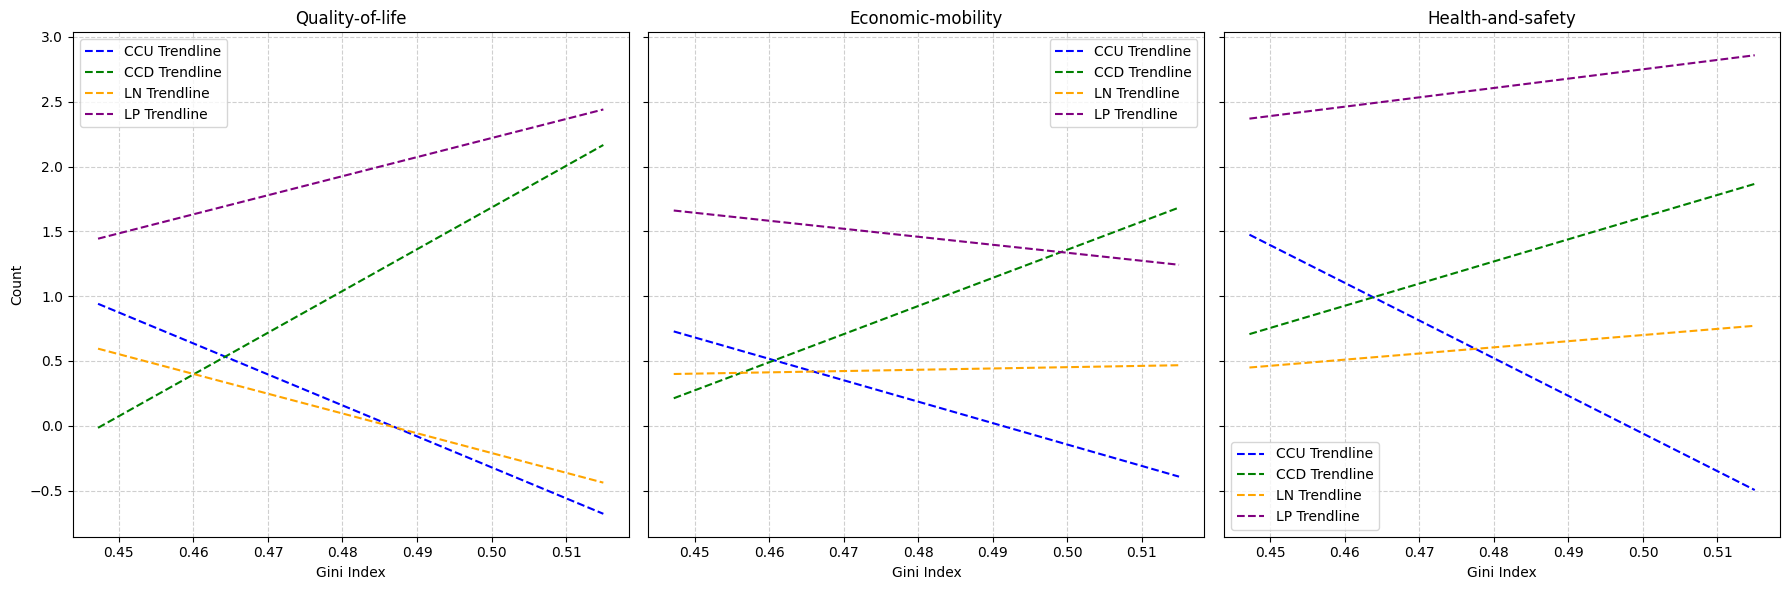

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Initialize subplots for the three amenities
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of amenities (metrics)
amenities = ["quality-of-life", "economic-mobility", "health-and-safety"]

# Colors for each category
colors = {"CCU": "blue", "CCD": "green", "LN": "orange", "LP": "purple"}

# Iterate over each amenity to create a subplot
for i, amenity in enumerate(amenities):
    ax = axs[i]
    
    # Filter data for the current amenity
    test_df = df_sorted.loc[:, df_sorted.columns.get_level_values('Metric').isin([amenity, 'Gini'])]
    test_df = test_df.loc[:, test_df.columns.get_level_values("Category").isin(trendlines + [''])]
    
    # Plot trendlines for each category
    for category in trendlines:
        # Extract founding dates (Distance) and values for the category
        founding_dates = test_df["Gini"].values
        values = test_df[(amenity, category)].values.flatten()

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(founding_dates, values)
        
        # Generate trendline
        trendline = slope * founding_dates + intercept
        ax.plot(founding_dates, trendline, color=colors[category], linestyle='--', label=f"{category} Trendline")
        
        # Display statistical information in console
        print(f"{amenity} - {category}:")
        print(f"  Slope: {slope:.3f}")
        print(f"  Intercept: {intercept:.3f}")
        print(f"  R-squared: {r_value**2:.3f}")
        print(f"  P-value: {p_value:.3e}")
        print(f"  Std Err: {std_err:.3f}")
    
    # Customize the subplot
    ax.set_title(f"{amenity.capitalize()}")
    ax.set_xlabel("Gini Index")
    if i == 0:
        ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()